# Market Basket Analysis(Association Rule Mining)

In [1]:
# Import statements

In [5]:
import pandas as pd 
import numpy as np         
import matplotlib.pyplot as plt 
%matplotlib inline   
import seaborn as sns  
import matplotlib.style    

from mlxtend.frequent_patterns import apriori, association_rules 
from collections import Counter 
from IPython.display import Image


# Data Loading

In [6]:

# Read the CSV file using relative path
df = pd.read_csv("../data/data.csv", encoding="unicode_escape")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploratory Data Analysis

In [7]:
data = df.copy()
data.shape

(541909, 8)

Checking for null values

In [8]:
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

Data Cleaning

In [9]:
new_data = data.dropna()

In [10]:
# Getting basics statistics
new_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Removing negative values from the quantity columns

In [11]:
new_data = new_data[new_data.Quantity > 0]
new_data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Now, ready to for further analysis

# Getting insights from the data

Looking for loyal customers in the data

In [12]:
# Creating the amount column
new_data['Amount'] = new_data['Quantity']*new_data['UnitPrice']
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
# Getting customers with the greatest number of orders
orders = new_data.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()
orders.head()

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


In [15]:
# Top 5 loyal customers with the most number of orders
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


Number of orders per customer

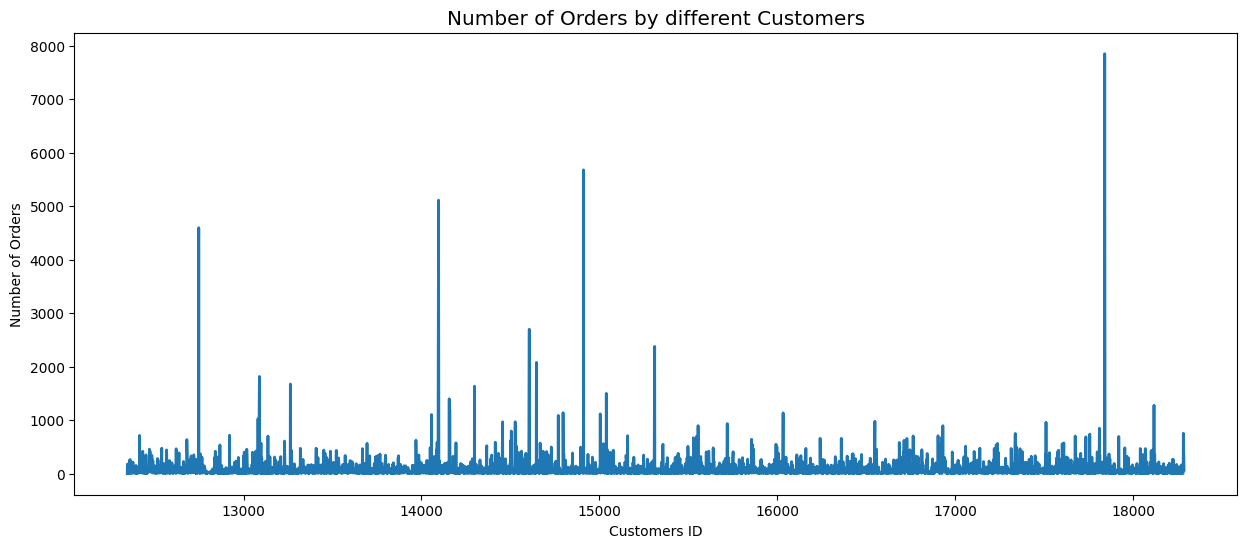

In [18]:
# Plotting orders by different customers  
# plt.subplot(figsize=(15,6)) 
plt.subplots(figsize=(15,6))

plt.style.use('bmh')
plt.plot(orders.CustomerID, orders.InvoiceNo) 

plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')

plt.title('Number of Orders by different Customers')
plt.show()

In [21]:
# Customers with the highest amount spent (invoices) 

money_spent = new_data.groupby(by=['CustomerID', 'Country'], as_index=False)['Amount'].sum()
print('The TOP 10 profitable customers with the highest money spent...')
money_spent.sort_values(by='Amount', ascending=False).head(10)


The TOP 10 profitable customers with the highest money spent...


,CustomerID,Country,Amount
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06
57,12415.0,Australia,124914.53
1342,14156.0,EIRE,117379.63
3780,17511.0,United Kingdom,91062.38
2711,16029.0,United Kingdom,81024.84
0,12346.0,United Kingdom,77183.60


Money Spent per Customer

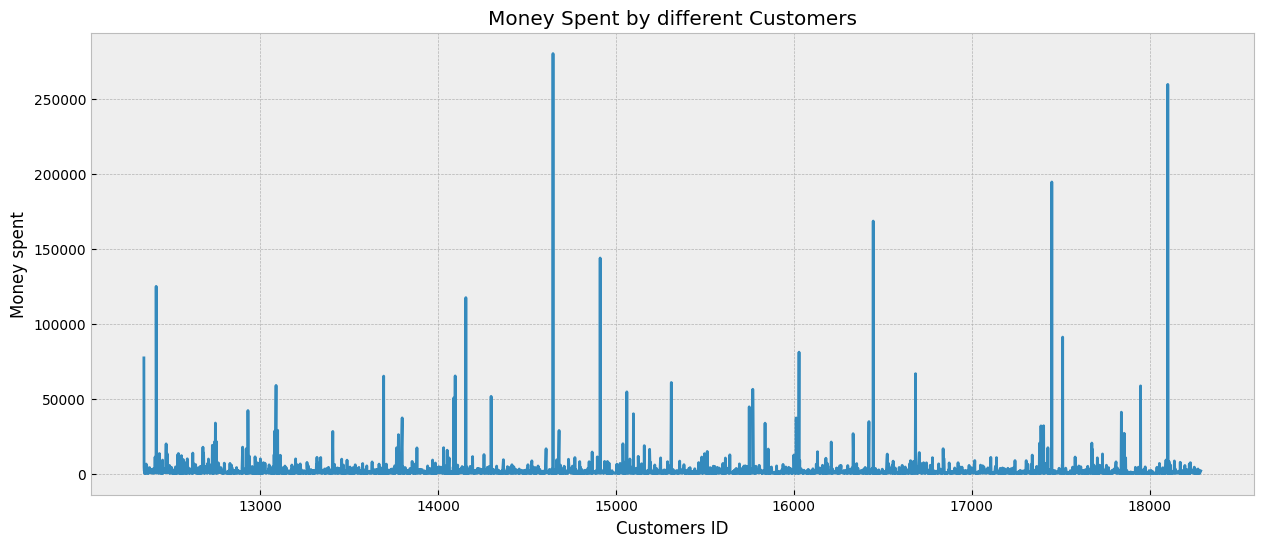

In [22]:
# Plotting money spent by different customers  
plt.subplots(figsize=(15,6))

plt.plot(money_spent.CustomerID, money_spent.Amount) 

plt.style.use('bmh')

plt.xlabel('Customers ID')
plt.ylabel('Money spent')

plt.title('Money Spent by different Customers')
plt.show()

# Getting Patterns Based on DateTime

In [23]:
import datetime                            

new_data['InvoiceDate'] = pd.to_datetime(new_data.InvoiceDate, format='%m/%d/%Y %H:%M')


In [24]:
# Creating new features based on date
new_data.insert(loc=2, column='year_month', value=new_data['InvoiceDate'].map(lambda x: 100*x.year + x.month))
# Month feature
new_data.insert(loc=3, column='month', value=new_data.InvoiceDate.dt.month)
# Day of week feature
new_data.insert(loc=4, column='day', value=(new_data.InvoiceDate.dt.dayofweek)+1)
# Hour feature
new_data.insert(loc=5, column='hour', value=new_data.InvoiceDate.dt.hour)


Getting Monthly Orders

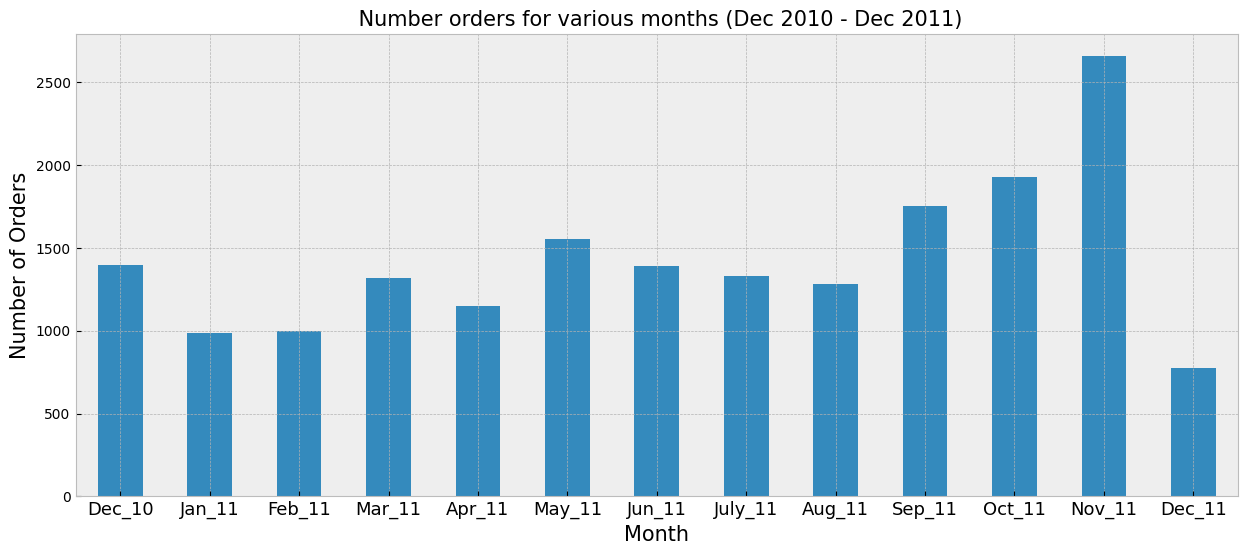

In [26]:
plt.style.use('bmh')

# Number of invoice per year and month
ax = new_data.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)

ax.set_title(' Number orders for various months (Dec 2010 - Dec 2011)',fontsize=15)

ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11',\
                   'Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'),
rotation='horizontal', fontsize=13)
plt.show()

Orders per day

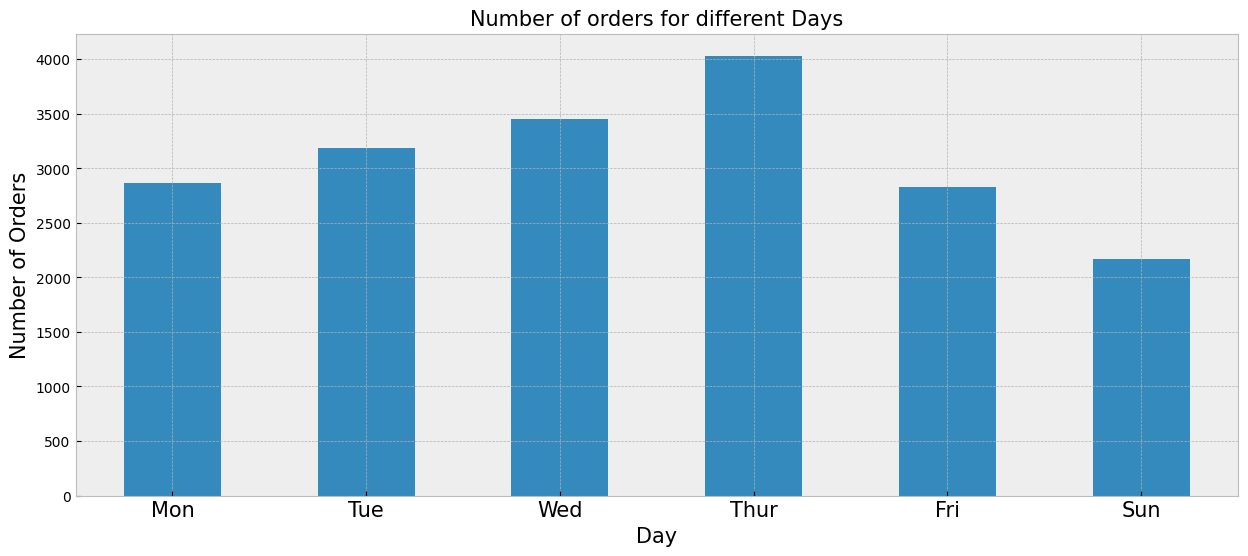

In [28]:
new_data[new_data['day']==6].shape[0]

ax = new_data.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)

ax.set_title('Number of orders for different Days',fontsize=15)

ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

Order per hour

In [37]:
# ax = new_data.groupby('InvoiceNo')['hour'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

# ax.set_xlabel('Hour',fontsize=15)
# ax.set_ylabel('Number of Orders',fontsize=15)

# ax.set_title('Number of orders for different Hours',fontsize=15)
# ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)

# plt.show()

In [35]:
# # ax = new_data.groupby('InvoiceNo')['hour'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
# # ax.set_xlabel('Hour', fontsize=15)
# # ax.set_ylabel('Number of Orders', fontsize=15)

# ax = new_data.groupby('InvoiceNo')['hour'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
# ax.set_xlabel('Hour', fontsize=15)
# ax.set_ylabel('Number of Orders', fontsize=15)


# ax.set_title('Number of orders for different Hours',fontsize=15)
# ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)

# plt.show()

In [36]:
# ax = new_data.groupby('InvoiceNo')['hour'].unique().apply(list).value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
# ax.set_xlabel('Hour', fontsize=15)
# ax.set_ylabel('Number of Orders', fontsize=15)
# ax.set_title('Number of orders for different Hours', fontsize=15)
# ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)
# plt.show()


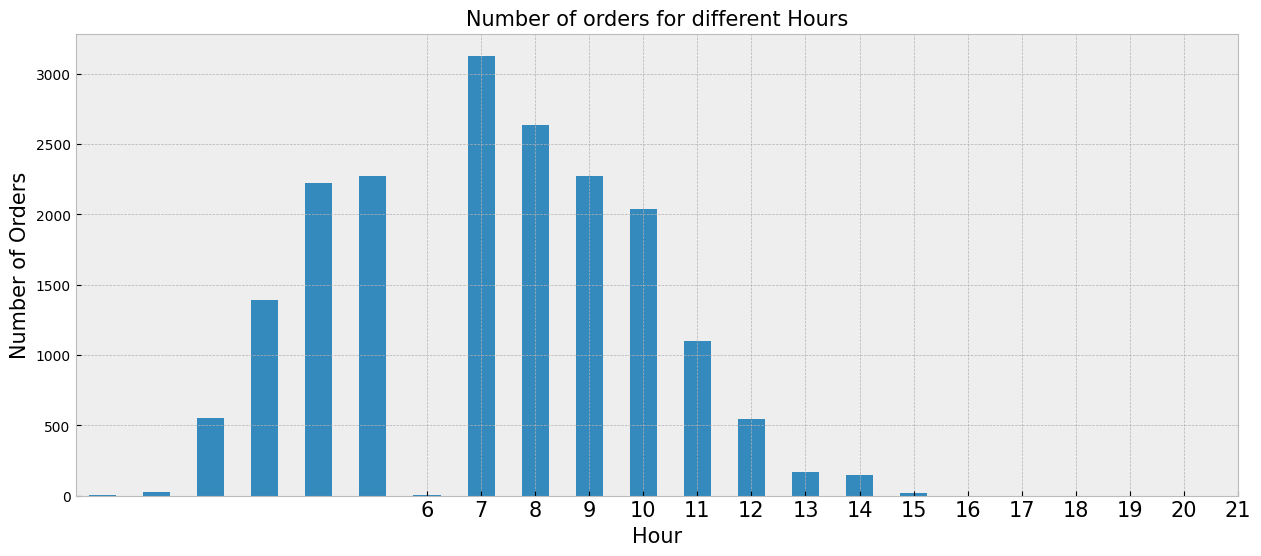

In [34]:
ax = new_data.groupby('InvoiceNo')['hour'].unique().apply(list).value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Hours', fontsize=15)
ax.set_xticks(range(6, 22))  # Set the ticks from 6 to 21 (inclusive)
ax.set_xticklabels(range(6, 22), rotation='horizontal', fontsize=15)  # Set the labels accordingly
plt.show()


Free item & Sales

In [38]:
new_data.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Since the minimum unit price = 0, there are either incorrect entries or free items.
Let’s check the distribution of unit prices.

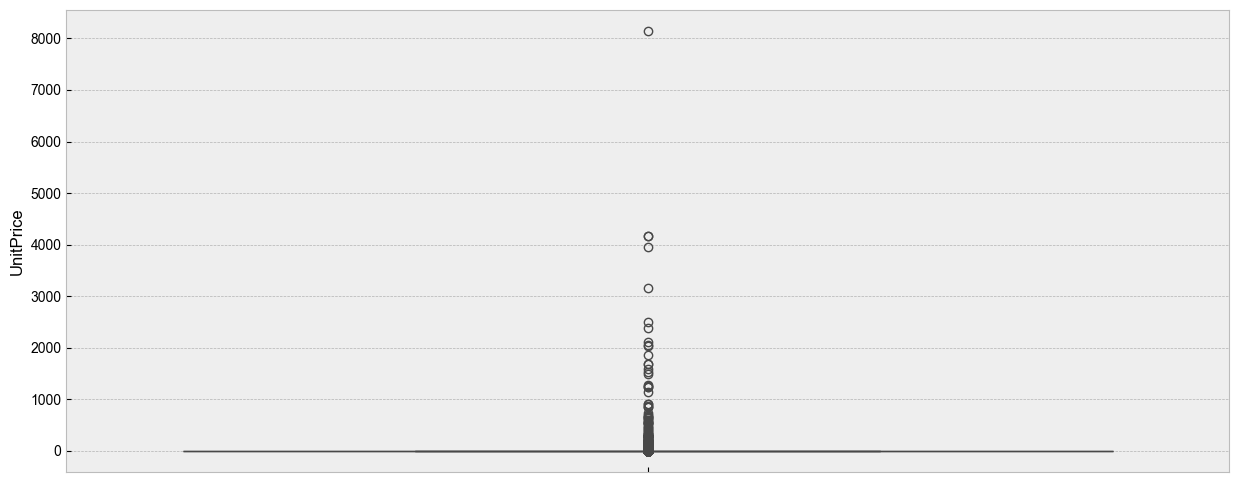

In [39]:
plt.subplots(figsize=(15,6))

sns.set_style('darkgrid')
#Box visualization
sns.boxplot(new_data.UnitPrice)

plt.show()

From this plot, we can see that Items with UnitPrice = 0 are not outliers. These are the “free” items.

In [44]:
# New dataframe for free items

NEW DATAFRAME FOR FREE ITEMS

In [50]:
free_items_df = new_data[new_data['UnitPrice'] == 0]
free_items_df.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
9302,537197,22841,201012,12,7,14,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,201012,12,4,14,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,201012,12,2,13,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,201101,1,4,16,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,201101,1,4,16,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0


Number of free items by month & year

In [52]:
free_items_df['year_month'].value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

we can see, there is at least one free item every month except June 2011

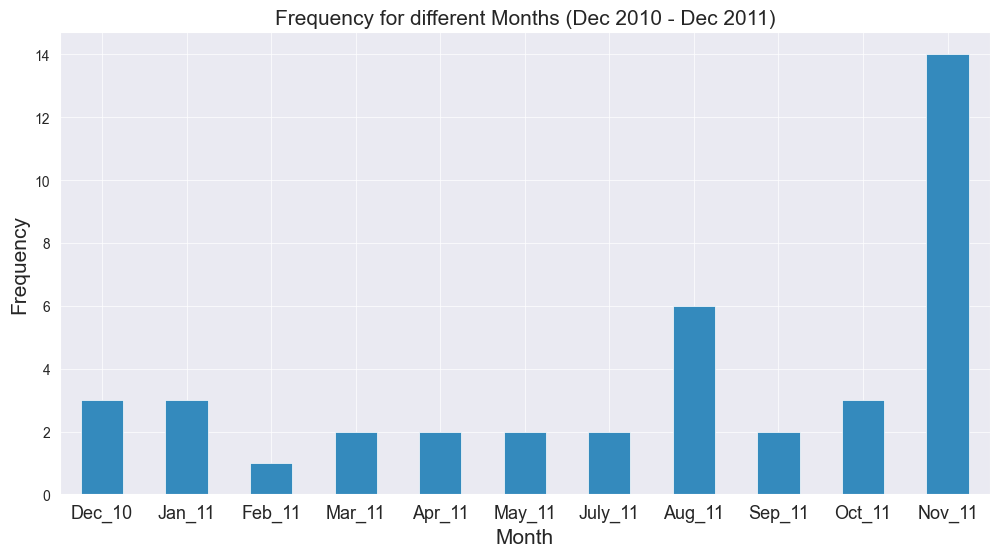

In [53]:
# Plotting the amount of free items by year & month
ax = free_items_df.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6))

ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)

ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)

ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11',\
			                 'Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal',fontsize=13)
plt.show()

The greatest number of free items were given out in November 2011 and in August 2011

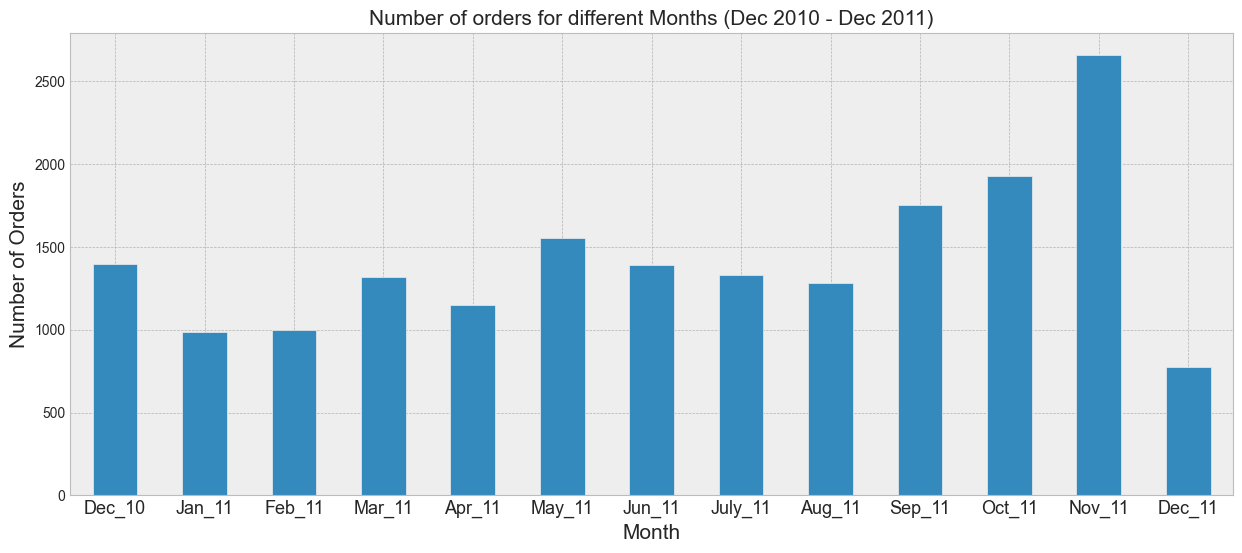

In [54]:
plt.style.use('bmh')

ax = new_data.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)

ax.set_title('Number of orders for different Months (Dec 2010 - Dec 2011)',fontsize=15)

ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11',\
                    'Sep_11','Oct_11','Nov_11','Dec_11'),
rotation='horizontal', fontsize=13)

plt.show()


The greatest amount of orders was taken place in November 2011.
Compared to the May month, the sales for the month of August have declined,indicating a slight effect from the “number of free items”.

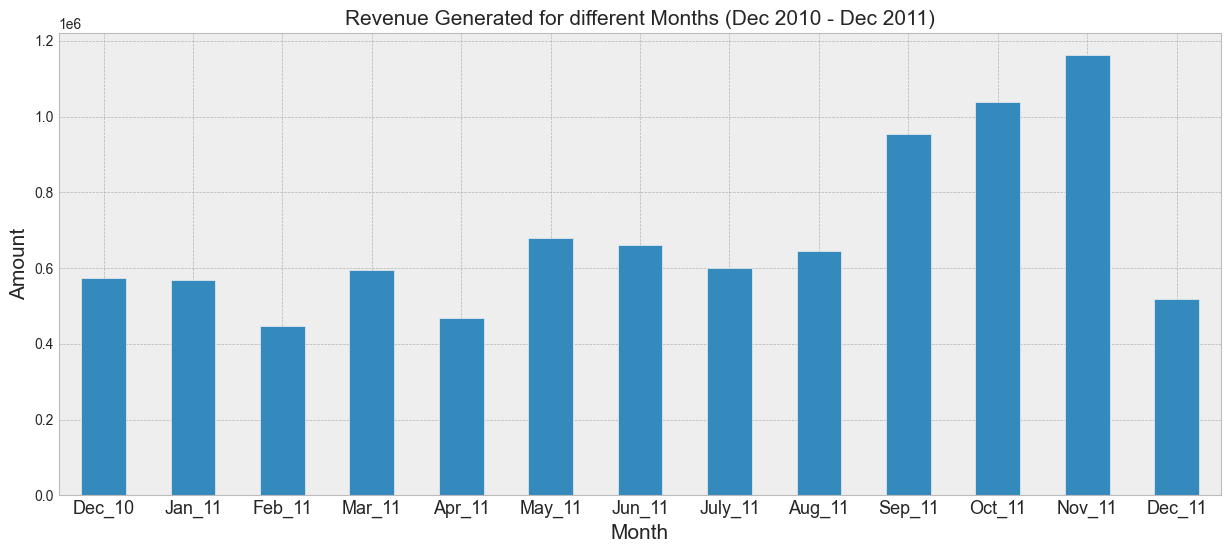

In [56]:
plt.style.use('bmh')

# Using groupby to sum the amount spent year-month wise
ax = new_data.groupby('year_month')['Amount'].sum().sort_index().plot(kind='bar',figsize=(15,6))

# Labelling X axis
ax.set_xlabel('Month',fontsize=15)

# Labelling Y axis
ax.set_ylabel('Amount',fontsize=15)

# Giving suitable title to the plot
ax.set_title('Revenue Generated for different Months (Dec 2010 - Dec 2011)',fontsize=15)

# Providing with X tick labels
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

plt.show()

GETTING USEFULL INFO FROM THE ITEMS

Most Sold Item Based on quantity

In [59]:
most_sold_items = new_data.pivot_table(index=['StockCode','Description'], values='Quantity', aggfunc='sum')\
                  .sort_values(by='Quantity', ascending=False)


In [60]:
most_sold_items

,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
85099B,JUMBO BAG RED RETROSPOT,46181
85123A,WHITE HANGING HEART T-LIGHT HOLDER,36725
...,...,...
21839,MUMMY MOUSE RED GINGHAM RIBBON,1
22199,FRYING PAN RED POLKADOT,1
90152B,BLUE/GREEN SHELL NECKLACE W PENDANT,1


Text(0, 0.5, 'Item')

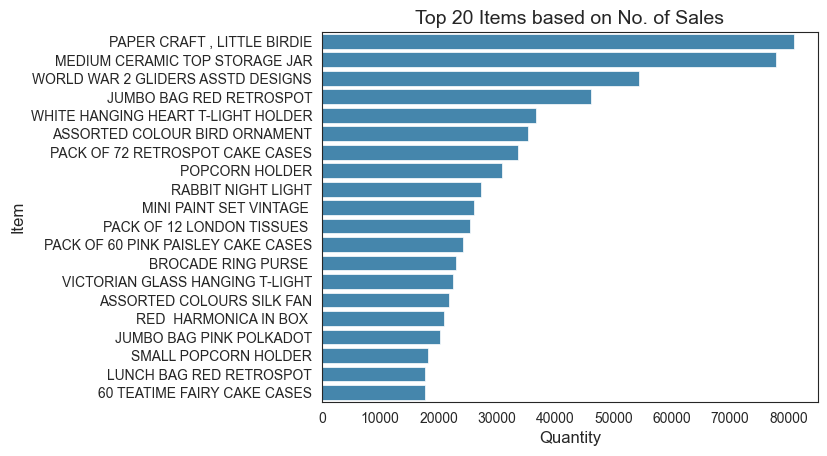

In [63]:
most_sold_items.reset_index(inplace=True)
sns.set_style('white')

# Creating a bar plot of Description ( or the item ) on the Y axis and the sum of Quantity on the X axis
sns.barplot(y='Description', x='Quantity', data=most_sold_items.head(20))

# Giving suitable title to the plot
plt.title('Top 20 Items based on No. of Sales', fontsize=14)

plt.ylabel('Item')

Items Bought by the Highest Number of Customers

In [65]:
# choosing WHITE HANGING HEART T-LIGHT HOLDER as a sample

df_white = new_data[new_data['Description']=='WHITE HANGING HEART T-LIGHT HOLDER']

In [66]:
df_white.shape

(2028, 13)

WHITE HANGING HEART T-LIGHT HOLDER has been ordered 2028 times

In [67]:
len(df_white.CustomerID.unique())

856

WHITE HANGING HEART T-LIGHT HOLDER has been ordered by 856 customers

In [68]:
# Creating a pivot table that displays the sum of unique Customers who bought particular item

bought_by_most_customers = new_data.pivot_table(index=['StockCode','Description'], values='CustomerID',\
                           aggfunc=lambda x: len(x.unique())).sort_values(by='CustomerID', ascending=False)

In [69]:
bought_by_most_customers


,,CustomerID
StockCode,Description,
22423,REGENCY CAKESTAND 3 TIER,881
85123A,WHITE HANGING HEART T-LIGHT HOLDER,856
47566,PARTY BUNTING,708
84879,ASSORTED COLOUR BIRD ORNAMENT,678
22720,SET OF 3 CAKE TINS PANTRY DESIGN,640
...,...,...
21897,POTTING SHED CANDLE CITRONELLA,1
84795C,OCEAN STRIPE HAMMOCK,1
90125E,AMBER BERTIE GLASS BEAD BAG CHARM,1


Text(0, 0.5, 'Item')

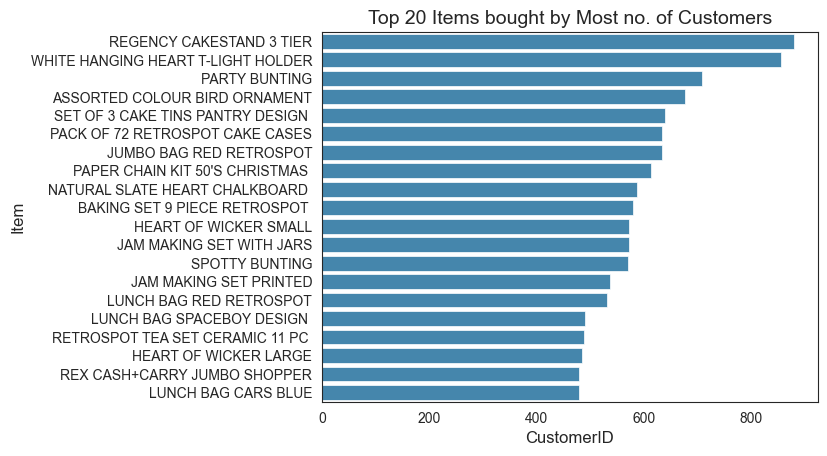

In [72]:
bought_by_most_customers.reset_index(inplace=True)
sns.set_style('white')

# Creating a bar plot of Description ( or the item ) on the Y axis and the sum of unique Customers on the X axis
sns.barplot(y='Description', x='CustomerID', data=bought_by_most_customers.head(20))

# Giving suitable title to the plot
plt.title('Top 20 Items bought by Most no. of Customers', fontsize=14)

plt.ylabel('Item')

Most Frequently Ordered Items

In [73]:
# Preparing data for wordcloud
new_data['items'] = new_data['Description'].str.replace(' ', '_')

In [79]:
# from wordcloud import WordCloud

# plt.rcParams['figure.figsize'] = (20, 20)
# wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121)\
#             .generate(str(new_data['items'] = new_data['Description'].str.replace(' ', '_')['items']))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.title('Most Frequently Bought Items',fontsize = 22)
# plt.show()

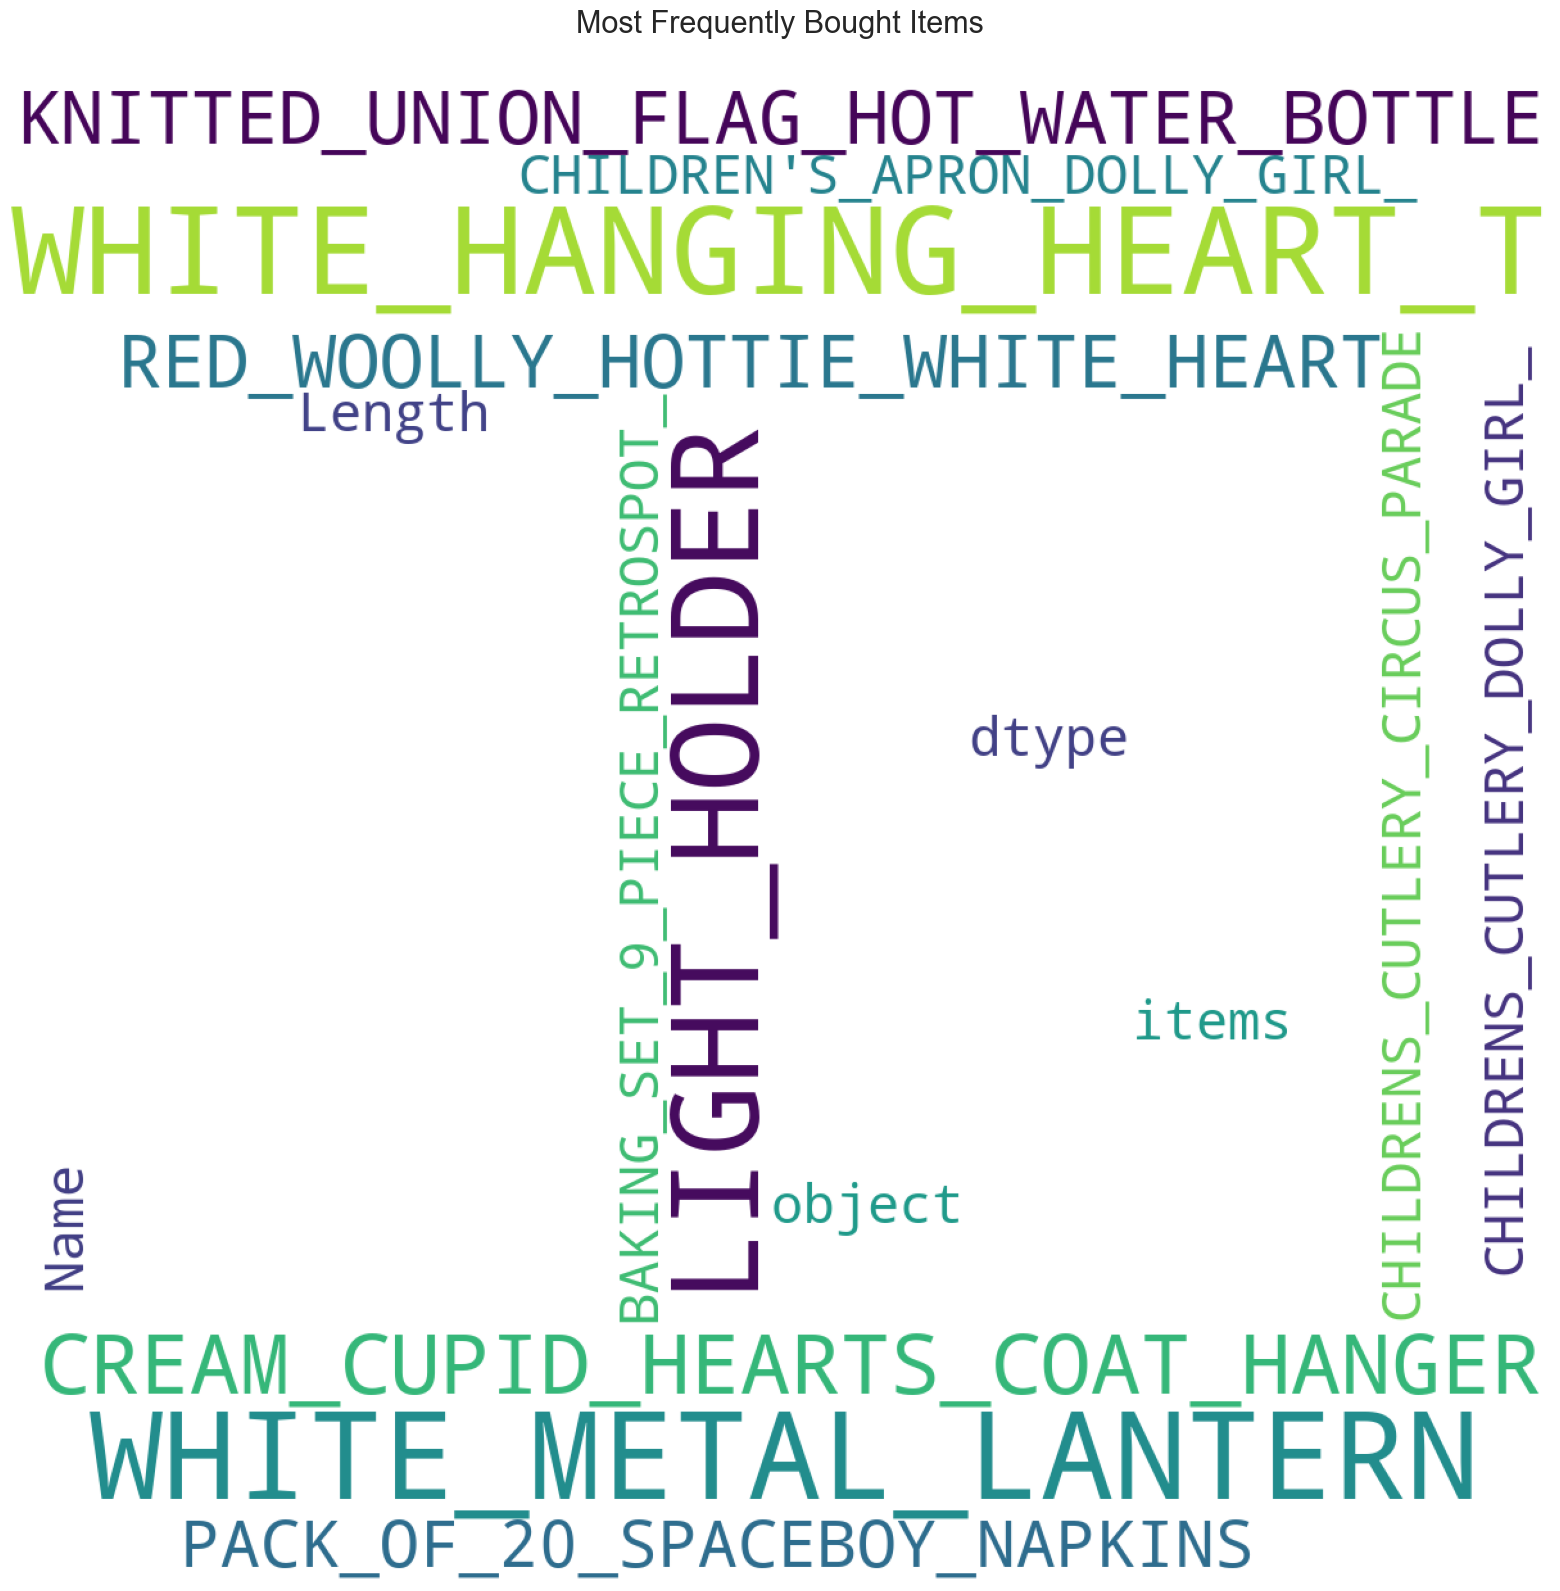

In [77]:
from wordcloud import WordCloud

# Assign the value first
new_data['items'] = new_data['Description'].str.replace(' ', '_')

# Then generate the word cloud
wordcloud = WordCloud(background_color='white', width=1200, height=1200, max_words=121)\
            .generate(str(new_data['items']))

# Plot the word cloud
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Frequently Bought Items', fontsize=22)
plt.show()


Top Ten First Choices

In [80]:
# Storing all the invoice numbers into a list y
y = new_data['InvoiceNo']
y = y.to_list()

In [81]:
len(y)

397924

In [82]:
# finding unique invoice numbers only and storing them in invoices list
invoices = list(set(y))

len(invoices)

18536

In [83]:
invoices

['578085',
 '556571',
 '570446',
 '575068',
 '559987',
 '537040',
 '559884',
 '569633',
 '549619',
 '558195',
 '572423',
 '565589',
 '572668',
 '575828',
 '576660',
 '579540',
 '538707',
 '541202',
 '556127',
 '570510',
 '538011',
 '555199',
 '561055',
 '564904',
 '554066',
 '573931',
 '538190',
 '580882',
 '553134',
 '565213',
 '552055',
 '552192',
 '579491',
 '536781',
 '538255',
 '538846',
 '553650',
 '562930',
 '570257',
 '570001',
 '536617',
 '551062',
 '555508',
 '563566',
 '571183',
 '577093',
 '543134',
 '557759',
 '543657',
 '580297',
 '562849',
 '580469',
 '567875',
 '552565',
 '579293',
 '559546',
 '550516',
 '578359',
 '574513',
 '564067',
 '558573',
 '567639',
 '542145',
 '536539',
 '540984',
 '574696',
 '564301',
 '541004',
 '575390',
 '545901',
 '569016',
 '571809',
 '537136',
 '564381',
 '550341',
 '544894',
 '554702',
 '580527',
 '569936',
 '540073',
 '550156',
 '543003',
 '578533',
 '540557',
 '549241',
 '575509',
 '539185',
 '550450',
 '556881',
 '561656',
 '569840',

In [85]:
first_choices = []

# looping into list of unique invoice numbers
for i in invoices:
    
    # the first item (index = 0) of every invoice is the first purchase
    # extracting the item name for the first purchase
    first_purchase = new_data[new_data['InvoiceNo']==i]['items'].reset_index(drop=True)[0]
    
    # Appending the first purchase name into first choices list
    first_choices.append(first_purchase)

In [87]:
first_choices[:5]


["WRAP_50'S__CHRISTMAS",
 'POTTING_SHED_TEA_MUG',
 'SET_OF_4_KNICK_KNACK_TINS_DOILY_',
 'RED_RETROSPOT_SHOPPER_BAG',
 'PACK_OF_60_MUSHROOM_CAKE_CASES']

In [89]:
# Length of first_choices mathches the lenght of invoices
len(first_choices)

4444

In [91]:
# Using counter to count repeating first choices
count = Counter(first_choices)

In [92]:
# Storing the counter into a datafrane
df_first_choices = pd.DataFrame.from_dict(count, orient='index').reset_index()

# Rename columns as item and count
df_first_choices.rename(columns={'index':'item', 0:'count'},inplace=True)

# Sorting the df based on count
df_first_choices.sort_values(by='count',ascending=False)

,item,count
274,WHITE_HANGING_HEART_T-LIGHT_HOLDER,49
5,REGENCY_CAKESTAND_3_TIER,42
27,PAPER_CHAIN_KIT_50'S_CHRISTMAS_,29
78,ASSORTED_COLOUR_BIRD_ORNAMENT,29
114,RABBIT_NIGHT_LIGHT,28
...,...,...
934,FRENCH_BLUE_METAL_DOOR_SIGN_3,1
937,SET/10_RED_POLKADOT_PARTY_CANDLES,1
938,LOVE_HEART_NAPKIN_BOX_,1
939,ROCOCO_WALL_MIRROR_WHITE,1


Text(0, 0.5, 'Item')

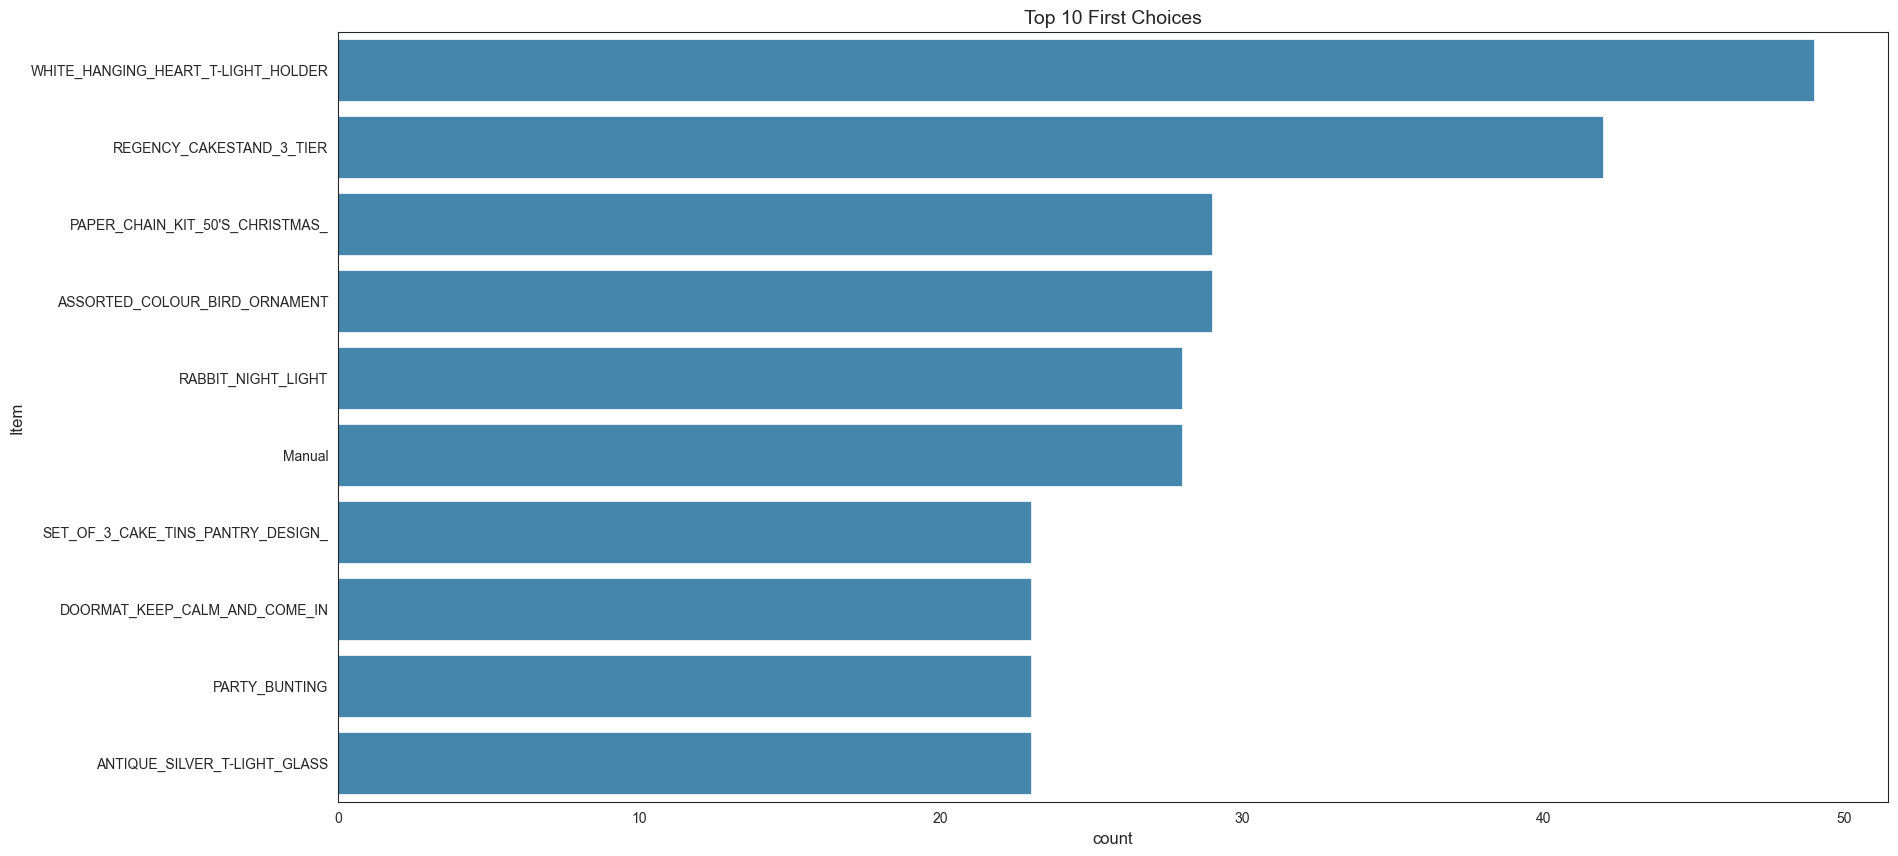

In [93]:
plt.subplots(figsize=(20,10))
sns.set_style('white')

# Creating a bar plot that displays Item name on the Y axis and Count on the X axis
sns.barplot(y='item', x='count', data=df_first_choices.sort_values(by='count',ascending=False).head(10))

# Giving suitable title to the plot
plt.title('Top 10 First Choices', fontsize=14)

plt.ylabel('Item')

FREQUENTLY BOUGHT TOGETHER (MBA):

In [94]:
# basket specifies if an item is present in a particular invoiceno
# for all items and all invoices
# this will denote the quantity present in the particular invoiceno which needs to be fixed

basket = (new_data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack()\
          .reset_index().fillna(0).set_index('InvoiceNo'))

In [95]:
basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

This code snippet is creating a "basket" of items for each unique invoice number (`InvoiceNo`). Here's a breakdown of what each part of the code is doing:

1. **`groupby(['InvoiceNo', 'Description'])['Quantity'].sum()`**: This groups the data by `InvoiceNo` and `Description` and sums up the quantities of each item in each invoice. This means that for each unique combination of `InvoiceNo` and `Description`, it calculates the total quantity of items purchased.

2. **`unstack()`**: This operation converts the hierarchical index created by the groupby operation into a more readable tabular format, with `Description` values as columns and `InvoiceNo` values as rows.

3. **`reset_index()`**: This resets the index of the DataFrame, moving the `InvoiceNo` values back into a regular column instead of an index.

4. **`fillna(0)`**: This fills any missing values (NaNs) with zeros. This is necessary because if there were no purchases of a particular item in a specific invoice, the unstack operation would create NaN values in the DataFrame.

5. **`set_index('InvoiceNo')`**: Finally, this sets the `InvoiceNo` column as the index of the DataFrame, making it easier to access data for a specific invoice later.

After executing these operations, the resulting DataFrame (`basket`) will have each unique `InvoiceNo` as rows, each unique item (`Description`) as columns, and the quantity of each item purchased in each invoice as the values. This format is commonly used for market basket analysis and other types of transactional data analysis.

In [96]:

def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)

This function, `encode_units`, is used to convert the quantity of items purchased into binary values indicating whether the item was purchased (1) or not (0). Here's how it works:

- The function takes a single argument, `x`, which represents the quantity of an item.
- Inside the function, it checks if the quantity (`x`) is less than 1. If it is, it returns 0, indicating that the item was not purchased.
- If the quantity is 1 or greater, it returns 1, indicating that the item was purchased.

This function is then applied to each element in the `basket` DataFrame using the `applymap` function. This means that every element in the DataFrame (which represents the quantity of each item in each invoice) will be passed through this function, resulting in a new DataFrame where each element is either 0 or 1, depending on whether the item was purchased.

In [97]:
basket.head(10)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Apriori Algorithm Concepts:

ASSOCIATION RULES IMPLEMENTATION USING MLXTEND:

In [99]:
# trying out on a sample item
wooden_star_df = basket.loc[basket['WOODEN STAR CHRISTMAS SCANDINAVIAN']==1]

This line of code is filtering the basket dataset to include only the transactions where the item "WOODEN STAR CHRISTMAS SCANDINAVIAN" was purchased. 

1. `basket`: This is the dataset that contains information about the items purchased in different transactions (invoices). Each row represents a transaction, and each column represents an item. The values in the dataset indicate whether a particular item was purchased in a transaction (1) or not (0).

2. `basket.loc[]`: This is a pandas DataFrame method used to select rows and columns by label. It allows us to locate specific rows based on their index labels or condition.

3. `[basket['WOODEN STAR CHRISTMAS SCANDINAVIAN']==1]`: This part of the code is a condition that filters the rows of the `basket` DataFrame. It selects only the rows where the column "WOODEN STAR CHRISTMAS SCANDINAVIAN" has a value of 1, indicating that the item "WOODEN STAR CHRISTMAS SCANDINAVIAN" was purchased in that transaction.

4. `wooden_star_df`: This variable stores the filtered DataFrame containing only the transactions where the item "WOODEN STAR CHRISTMAS SCANDINAVIAN" was purchased. It allows further analysis or processing specific to those transactions.

In [100]:

# Applying apriori algorithm for wooden_star_df
frequent_itemsets = apriori(wooden_star_df, min_support=0.15, use_colnames=True)

# Storing the association rules into rules
wooden_star_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sorting the rules on lift and support
wooden_star_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.736721,0.521940,0.420323,0.570533,1.093101,0.035799,1.113147,0.323501
1,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160
2,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.736721,0.521940,0.420323,0.570533,1.093101,0.035799,1.113147,0.323501
3,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160
4,(WOODEN HEART CHRISTMAS SCANDINAVIAN),"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR...",0.736721,0.521940,0.420323,0.570533,1.093101,0.035799,1.113147,0.323501
5,(WOODEN TREE CHRISTMAS SCANDINAVIAN),"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",0.521940,0.736721,0.420323,0.805310,1.093101,0.035799,1.352299,0.178160
6,(PAPER CHAIN KIT 50'S CHRISTMAS ),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.221709,0.736721,0.177829,0.802083,1.088721,0.014492,1.330254,0.104705
7,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.736721,0.221709,0.177829,0.241379,1.088721,0.014492,1.025929,0.309524
8,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, PAPER CHA...",(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.221709,0.736721,0.177829,0.802083,1.088721,0.014492,1.330254,0.104705
9,"(WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN HE...",(PAPER CHAIN KIT 50'S CHRISTMAS ),0.736721,0.221709,0.177829,0.241379,1.088721,0.014492,1.025929,0.309524


This code snippet is implementing the Apriori algorithm to generate association rules for the sample item "WOODEN STAR CHRISTMAS SCANDINAVIAN". Here's what each part of the code does:

1. **Apriori Algorithm**: 
   - `apriori(wooden_star_df, min_support=0.15, use_colnames=True)`: This function applies the Apriori algorithm to the dataset containing transactions involving the item "WOODEN STAR CHRISTMAS SCANDINAVIAN". 
   - `min_support=0.15`: This parameter specifies the minimum support threshold for an itemset to be considered frequent. Items with a support value greater than or equal to this threshold are included in the frequent itemsets.
   - `use_colnames=True`: This parameter indicates that the item names should be used in the resulting DataFrame instead of column indices.

2. **Association Rules**:
   - `association_rules(frequent_itemsets, metric="lift", min_threshold=1)`: This function generates association rules from the frequent itemsets obtained from the Apriori algorithm. 
   - `metric="lift"`: This parameter specifies the metric to be used for evaluating the association rules. In this case, it's the lift metric, which measures the importance of the association rule.
   - `min_threshold=1`: This parameter sets the minimum threshold for the evaluation metric. Rules with a lift value greater than or equal to 1 are selected.

3. **Sorting Rules**:
   - `wooden_star_rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)`: This line sorts the generated association rules based on the lift and support values in descending order. It then resets the index of the DataFrame to ensure a clean index structure.

Overall, this code snippet identifies association rules between the "WOODEN STAR CHRISTMAS SCANDINAVIAN" item and other items in the transactions, based on their support and lift values.

Creating a function that will get an item name as input and return others items that are bought together with it

In [110]:
def frequently_bought_together(item):
    """
    This function returns the items which are likely to be bought by a user because they bought the item passed into the function.
    """
    # DataFrame of the item passed
    item_df = basket.loc[basket[item] == 1]
    
    # Applying Apriori algorithm on the item DataFrame
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting on lift and support
    rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    # Returning the top 10 items with the highest lift and support
    return rules['consequents'].unique()[:10]


1. **Function Definition**: 
    - `def frequently_bought_together(item):` defines a function named `frequently_bought_together` that takes one parameter `item`.

2. **Docstring**:
    - `""" This function returns the items which are likely to be bought by a user because they bought the item passed into the function. """`
      - Provides a brief description of what the function does. This is called a docstring, and it helps users understand the purpose of the function.

3. **DataFrame Creation**:
    - `item_df = basket.loc[basket[item] == 1]`
      - Selects rows from the DataFrame `basket` where the column `item` has a value of 1, indicating that the item was bought.

4. **Apriori Algorithm**:
    - `frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)`
      - Applies the Apriori algorithm to `item_df` to find frequent itemsets with a minimum support of 0.15.
    
5. **Association Rules**:
    - `rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)`
      - Generates association rules from the frequent itemsets using the lift metric with a minimum threshold of 1.

6. **Sorting Rules**:
    - `rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)`
      - Sorts the generated association rules based on the lift and support values in descending order and resets the index.

7. **Print Statement**:
    - `print('Items frequently bought together with {0}'.format(item))`
      - Prints a message indicating the item for which the frequently bought items are being displayed.

8. **Returning Results**:
    - `return rules['consequents'].unique()[:10]`
      - Returns the unique consequent items from the association rules, representing the items frequently bought together with the input `item`. It limits the output to the top 10 items.

Overall, this function takes an item as input, finds association rules using the Apriori algorithm based on transactions involving that item, sorts the rules, and returns the top 10 consequent items that are frequently bought together with the input item.

In [111]:
frequently_bought_together('WOODEN STAR CHRISTMAS SCANDINAVIAN')


Items frequently bought together with WOODEN STAR CHRISTMAS SCANDINAVIAN


array([frozenset({'WOODEN TREE CHRISTMAS SCANDINAVIAN'}),
       frozenset({'WOODEN HEART CHRISTMAS SCANDINAVIAN'}),
       frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', 'WOODEN TREE CHRISTMAS SCANDINAVIAN'}),
       frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', 'WOODEN HEART CHRISTMAS SCANDINAVIAN'}),
       frozenset({"PAPER CHAIN KIT 50'S CHRISTMAS "}),
       frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', "PAPER CHAIN KIT 50'S CHRISTMAS "}),
       frozenset({'SET OF 3 WOODEN HEART DECORATIONS'}),
       frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', 'SET OF 3 WOODEN HEART DECORATIONS'}),
       frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN'}),
       frozenset({'WOODEN HEART CHRISTMAS SCANDINAVIAN', 'WOODEN TREE CHRISTMAS SCANDINAVIAN'})],
      dtype=object)

In [112]:
frequently_bought_together('WHITE METAL LANTERN')

Items frequently bought together with WHITE METAL LANTERN


array([frozenset({'WHITE METAL LANTERN'}),
       frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}),
       frozenset({'REGENCY CAKESTAND 3 TIER'}),
       frozenset({'LANTERN CREAM GAZEBO '})], dtype=object)

In [114]:
frequently_bought_together('JAM MAKING SET WITH JARS')

Items frequently bought together with JAM MAKING SET WITH JARS


array([frozenset({'JAM MAKING SET WITH JARS'}),
       frozenset({'JAM MAKING SET PRINTED'}),
       frozenset({'SET OF 3 CAKE TINS PANTRY DESIGN '}),
       frozenset({'RECIPE BOX PANTRY YELLOW DESIGN'}),
       frozenset({'SET OF 4 PANTRY JELLY MOULDS'}),
       frozenset({'REGENCY CAKESTAND 3 TIER'}),
       frozenset({'SET OF 6 SPICE TINS PANTRY DESIGN'}),
       frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})], dtype=object)

Checking Validation

In [115]:
new_data[new_data['InvoiceNo']=='536390']

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,items
211,536390,22941,201012,12,3,10,CHRISTMAS LIGHTS 10 REINDEER,2,2010-12-01 10:19:00,8.50,17511.0,United Kingdom,17.00,CHRISTMAS_LIGHTS_10_REINDEER
212,536390,22960,201012,12,3,10,JAM MAKING SET WITH JARS,12,2010-12-01 10:19:00,3.75,17511.0,United Kingdom,45.00,JAM_MAKING_SET_WITH_JARS
213,536390,22961,201012,12,3,10,JAM MAKING SET PRINTED,12,2010-12-01 10:19:00,1.45,17511.0,United Kingdom,17.40,JAM_MAKING_SET_PRINTED
214,536390,22962,201012,12,3,10,JAM JAR WITH PINK LID,48,2010-12-01 10:19:00,0.72,17511.0,United Kingdom,34.56,JAM_JAR_WITH_PINK_LID
215,536390,22963,201012,12,3,10,JAM JAR WITH GREEN LID,48,2010-12-01 10:19:00,0.72,17511.0,United Kingdom,34.56,JAM_JAR_WITH_GREEN_LID
216,536390,22968,201012,12,3,10,ROSE COTTAGE KEEPSAKE BOX,8,2010-12-01 10:19:00,8.50,17511.0,United Kingdom,68.00,ROSE_COTTAGE_KEEPSAKE_BOX_
217,536390,84970S,201012,12,3,10,HANGING HEART ZINC T-LIGHT HOLDER,144,2010-12-01 10:19:00,0.64,17511.0,United Kingdom,92.16,HANGING_HEART_ZINC_T-LIGHT_HOLDER
218,536390,22910,201012,12,3,10,PAPER CHAIN KIT VINTAGE CHRISTMAS,40,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,102.00,PAPER_CHAIN_KIT_VINTAGE_CHRISTMAS
219,536390,20668,201012,12,3,10,DISCO BALL CHRISTMAS DECORATION,288,2010-12-01 10:19:00,0.10,17511.0,United Kingdom,28.80,DISCO_BALL_CHRISTMAS_DECORATION
220,536390,85123A,201012,12,3,10,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,163.20,WHITE_HANGING_HEART_T-LIGHT_HOLDER


We can seet that the recommender is performing well, cause there are some common items between the recommendations from the bought_together_frequently function and the invoice.

Association Rules Visualization

In [116]:
# Using above WOODEN STAR DataFrame
support=wooden_star_rules.support.values
confidence=wooden_star_rules.confidence.values

In [118]:
support

array([0.1778291 , 0.1778291 , 0.22170901, 0.22170901, 0.15242494,
       0.15242494, 0.19861432, 0.19861432, 0.16397229, 0.16397229,
       0.18244804, 0.18244804, 0.18244804, 0.18244804, 0.17090069,
       0.17090069, 0.73672055, 0.73672055, 0.42032333, 0.42032333,
       0.52193995, 0.52193995, 0.16397229, 0.16397229, 0.1778291 ,
       0.1778291 , 0.1778291 , 0.1778291 , 0.1778291 , 0.1778291 ,
       0.15242494, 0.15242494, 0.15242494, 0.15242494, 0.15242494,
       0.15242494, 0.42032333, 0.42032333, 0.42032333, 0.42032333,
       0.42032333, 0.42032333])

In [119]:
confidence

array([0.80208333, 0.24137931, 0.22170901, 1.        , 0.20689655,
       0.76744186, 0.19861432, 1.        , 1.        , 0.16397229,
       1.        , 0.18244804, 1.        , 0.18244804, 0.17090069,
       1.        , 0.73672055, 1.        , 0.57053292, 0.80530973,
       0.52193995, 1.        , 0.16397229, 1.        , 0.80208333,
       0.24137931, 1.        , 0.1778291 , 0.80208333, 0.24137931,
       0.20689655, 0.76744186, 1.        , 0.15242494, 0.20689655,
       0.76744186, 0.57053292, 0.80530973, 1.        , 0.42032333,
       0.57053292, 0.80530973])

In [120]:
import networkx as nx


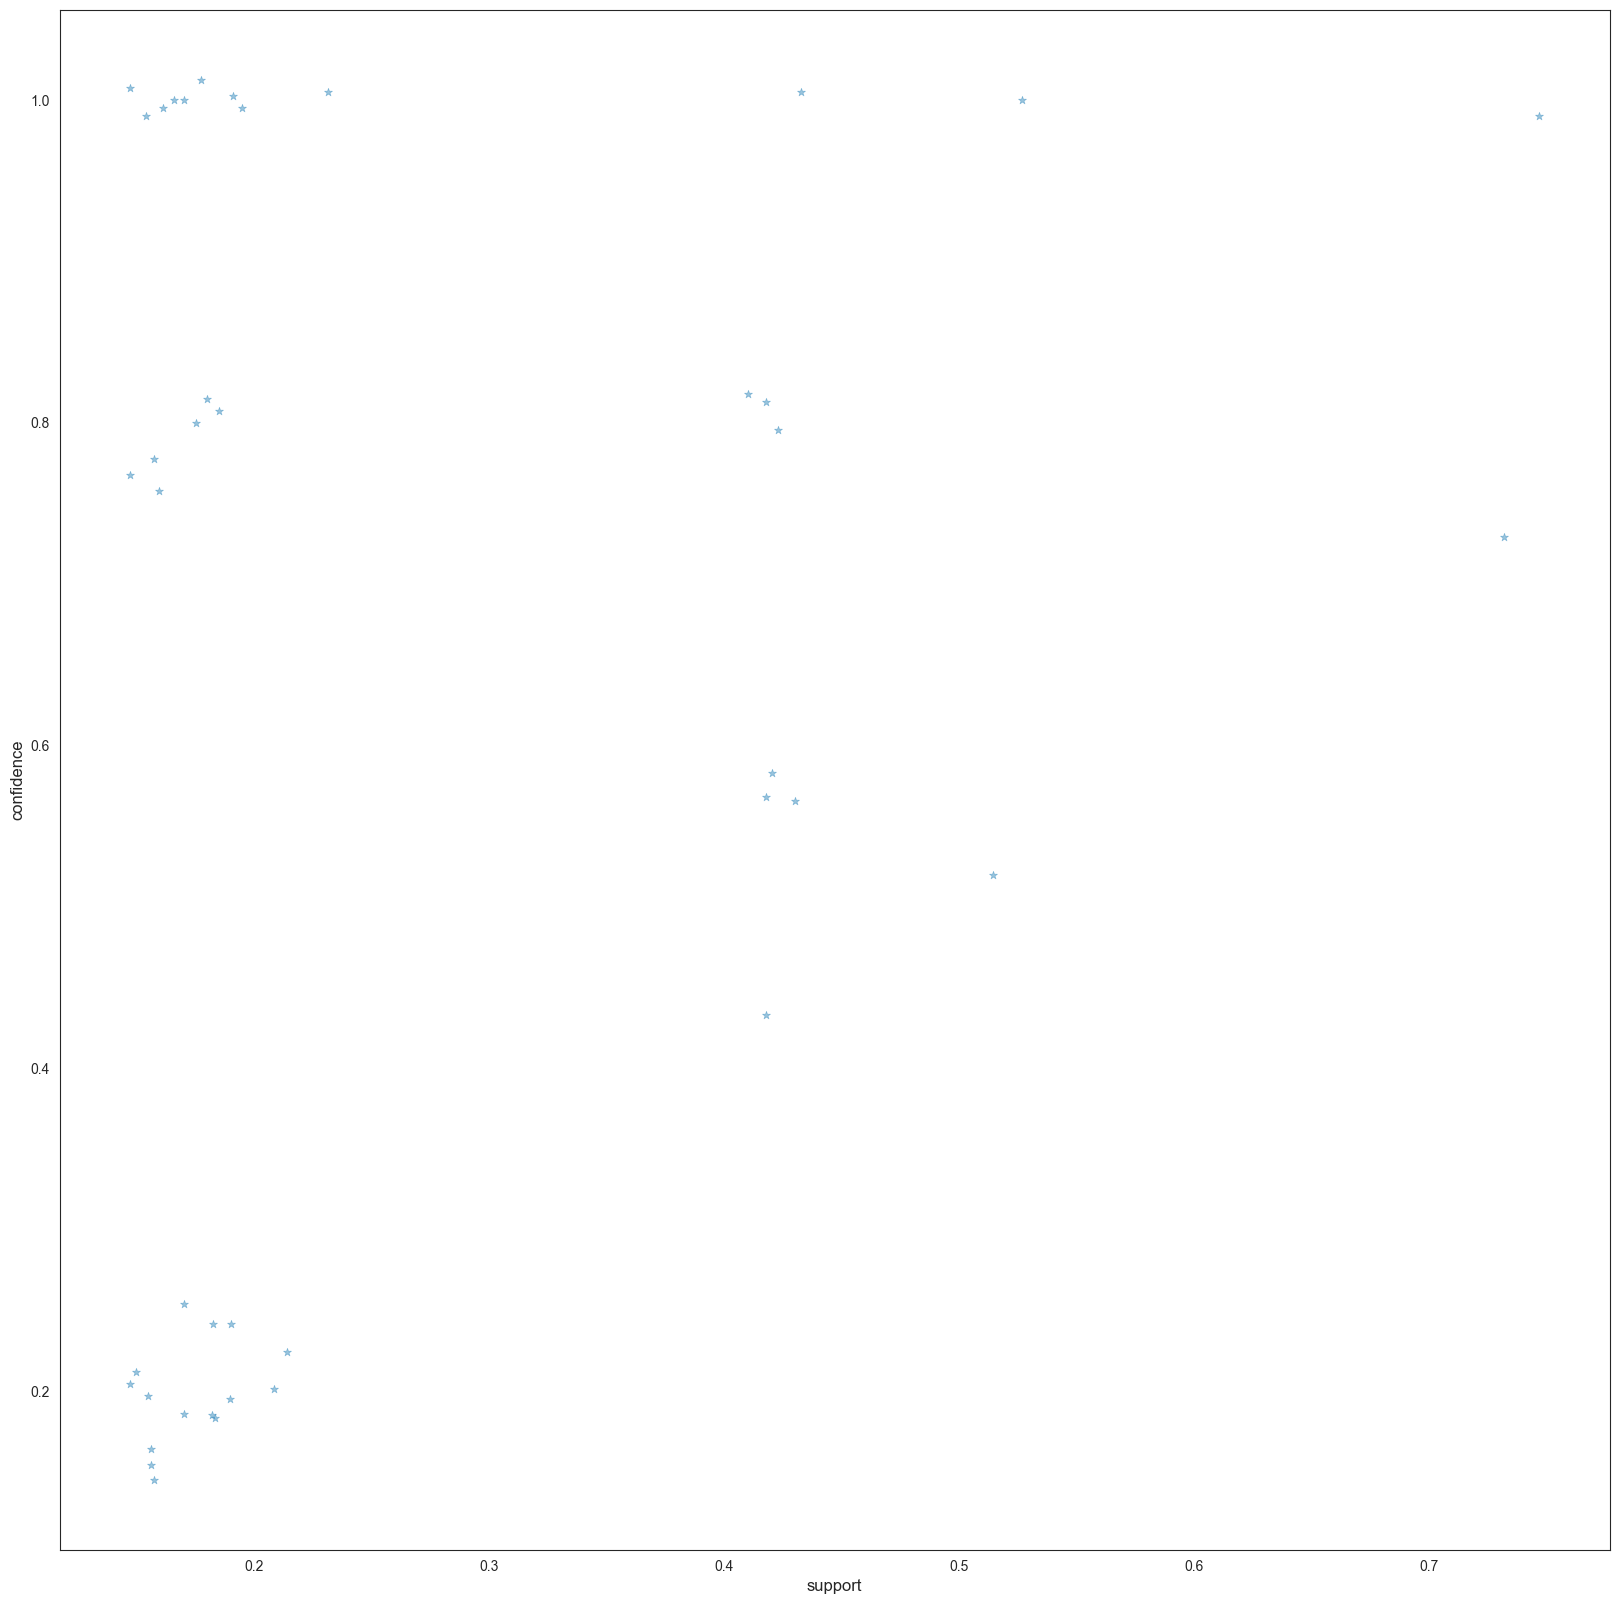

In [121]:
import random
 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Creating a scatter plot of support v confidence    
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

GRAPH REPRESENTATION

In [129]:
# def wooden_star_graph(wooden_star_rules, no_of_rules):
#     G1 = nx.DiGraph()
    
#     color_map = []
#     N = 50
#     colors = np.random.rand(N)    
#     strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
    
#     for i in range(no_of_rules):      
#         # adding as many nodes as the number of rules requested by the user
#         G1.add_nodes_from(["R"+str(i)])
        
#         # adding antecedents to the nodes 
#         for a in wooden_star_rules.iloc[i]['antecedents']:
#             G1.add_nodes_from([a])
#             G1.add_edge(a, "R"+str(i), color=colors[i] , weight=2)
        
#         # adding consequents to the nodes
#         for c in wooden_star_rules.iloc[i]['consequents']:
#             G1.add_nodes_from([c])
#             G1.add_edge("R"+str(i), c, color=colors[i], weight=2)
 
#     for node in G1:
#         found_a_string = False
#         for item in strs: 
#             if node == item:
#                 found_a_string = True
#         if found_a_string:
#             color_map.append('yellow')
#         else:
#             color_map.append('green')       
    
#     edges = G1.edges()
#     colors = [G1[u][v]['color'] for u, v in edges]
#     weights = [G1[u][v]['weight'] for u, v in edges]
 
#     pos = nx.spring_layout(G1, k=16, scale=1)
#     nx.draw(G1, pos, edges=edges, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
#     for p in pos:  # raise text positions
#         pos[p][1] += 0.07
#     nx.draw_networkx_labels(G1, pos)
#     plt.show()


In [130]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def wooden_star_graph(wooden_star_rules, no_of_rules):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(no_of_rules):
        # Adding as many nodes as the number of rules requested by the user
        G1.add_nodes_from(["R" + str(i)])
        
        # Adding antecedents to the nodes
        for a in wooden_star_rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)
        
        # Adding consequents to the nodes
        for c in wooden_star_rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)

    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

# Example usage
# wooden_star_graph(wooden_star_rules, 5)


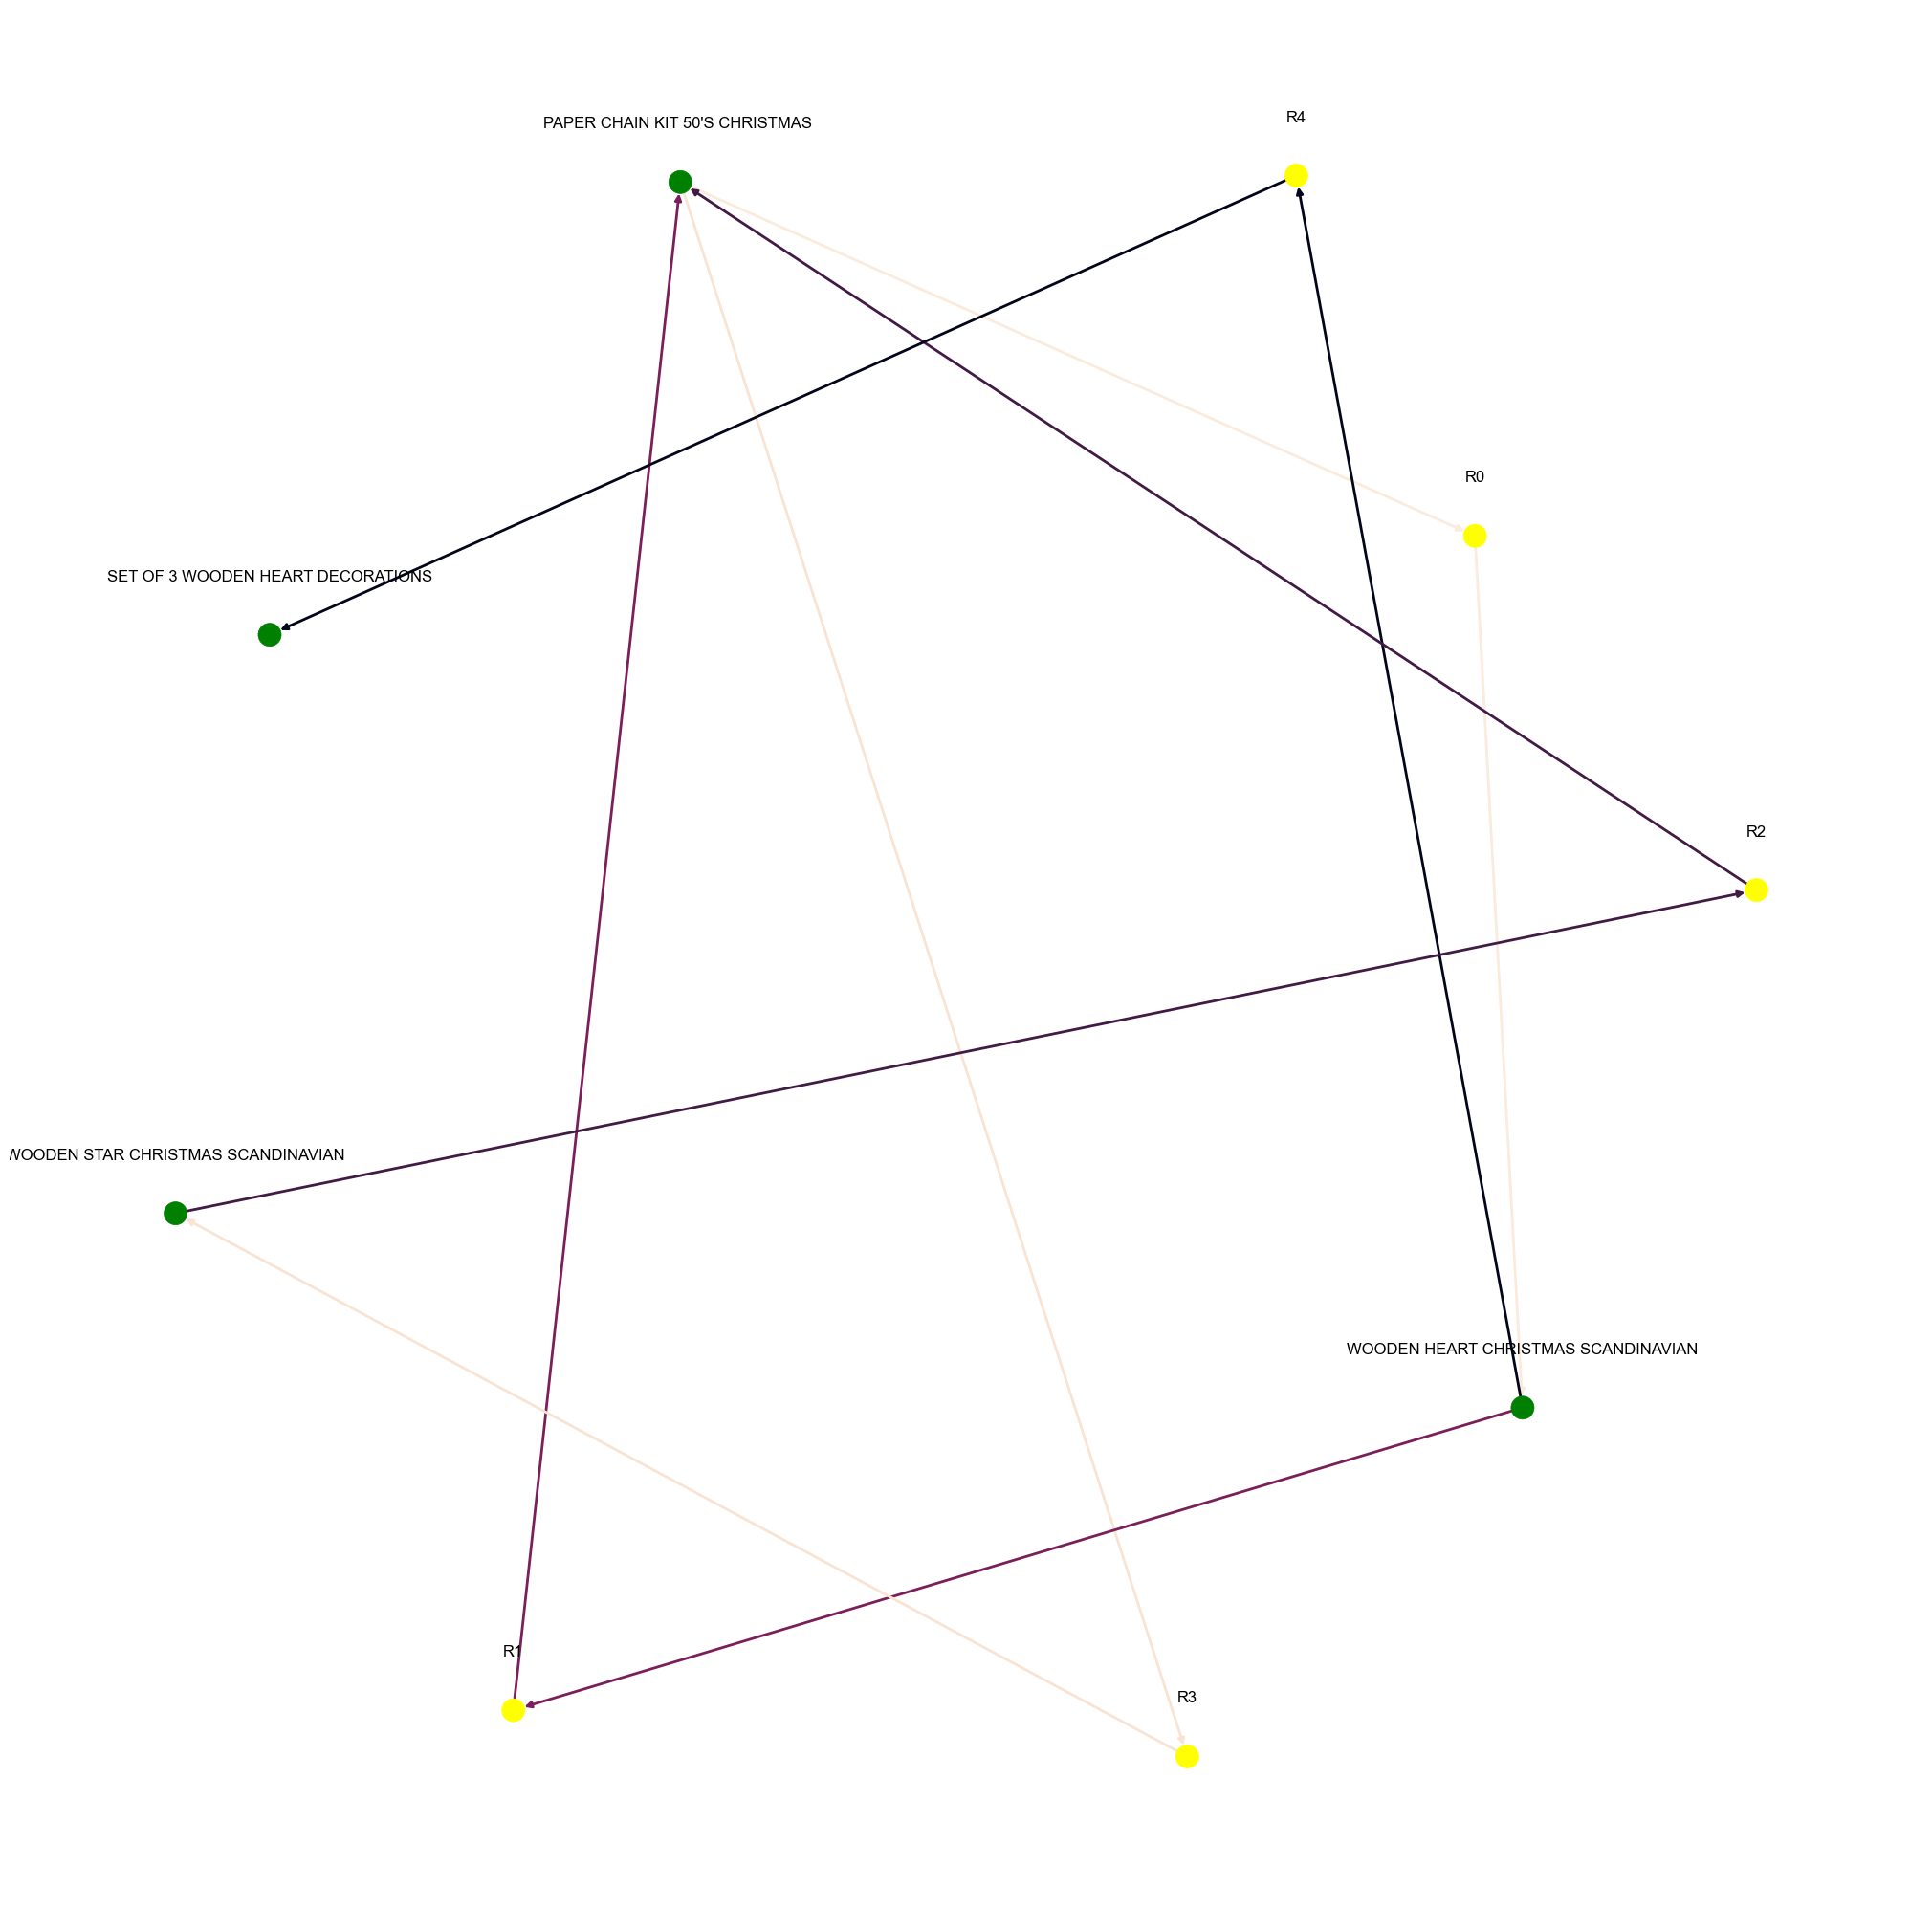

In [131]:
wooden_star_graph(wooden_star_rules,5)


In [132]:
def visualize_rules(item, no_of_rules):
    
    
  # df of item passed
  item_df = basket.loc[basket[item]==1]
    
  # Applying apriori algorithm on item df
  frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
  # Storing association rules
  rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
  # Sorting on lift and support
  rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    
  print('Items frequently bought together with {0}'.format(item))
    
  # Returning top 6 items with highest lift and support
  print(rules['consequents'].unique()[:6])
    
  
  support = rules.support.values
  confidence = rules.confidence.values
  

  for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
    
  # Creating scatter plot of support v confidence  
  plt.scatter(support, confidence, alpha=0.5, marker="*")
  plt.title('Support vs Confidence graph')
  plt.xlabel('support')
  plt.ylabel('confidence') 
  plt.show()  
     
  # Creating a new digraph  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
  # adding as many nodes as number of rules requested by user 
  for i in range (no_of_rules):      
    G1.add_nodes_from(["R"+str(i)])
    
    # adding antecedents to the nodes 
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
    
    # adding consequents to the nodes
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
  print('Visualization of Rules')
  
 
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()


In [135]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

def visualize_rules(item, no_of_rules):
    # DataFrame of the item passed
    item_df = basket.loc[basket[item] == 1]
    
    # Applying Apriori algorithm on the item DataFrame
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting on lift and support
    rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    # Returning top 6 items with highest lift and support
    print(rules['consequents'].unique()[:6])
    
    support = rules.support.values
    confidence = rules.confidence.values
    
    for i in range(len(support)):
        support[i] = support[i] + 0.0025 * (random.randint(1, 10) - 5) 
        confidence[i] = confidence[i] + 0.0025 * (random.randint(1, 10) - 5)
    
    # Creating scatter plot of support vs confidence  
    plt.scatter(support, confidence, alpha=0.5, marker="*")
    plt.title('Support vs Confidence graph')
    plt.xlabel('support')
    plt.ylabel('confidence') 
    plt.show()  
    
    # Creating a new digraph  
    G1 = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)    
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
    
    # Adding as many nodes as the number of rules requested by the user 
    for i in range(no_of_rules):      
        G1.add_nodes_from(["R" + str(i)])
        
        # Adding antecedents to the nodes 
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R" + str(i), color=colors[i], weight=2)
        
        # Adding consequents to the nodes
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R" + str(i), c, color=colors[i], weight=2)
    
    print('Visualization of Rules')
    
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
    
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]
    
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
    
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

Items frequently bought together with WOODEN STAR CHRISTMAS SCANDINAVIAN
[frozenset({'WOODEN TREE CHRISTMAS SCANDINAVIAN'})
 frozenset({'WOODEN HEART CHRISTMAS SCANDINAVIAN'})
 frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', 'WOODEN TREE CHRISTMAS SCANDINAVIAN'})
 frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', 'WOODEN HEART CHRISTMAS SCANDINAVIAN'})
 frozenset({"PAPER CHAIN KIT 50'S CHRISTMAS "})
 frozenset({'WOODEN STAR CHRISTMAS SCANDINAVIAN', "PAPER CHAIN KIT 50'S CHRISTMAS "})]


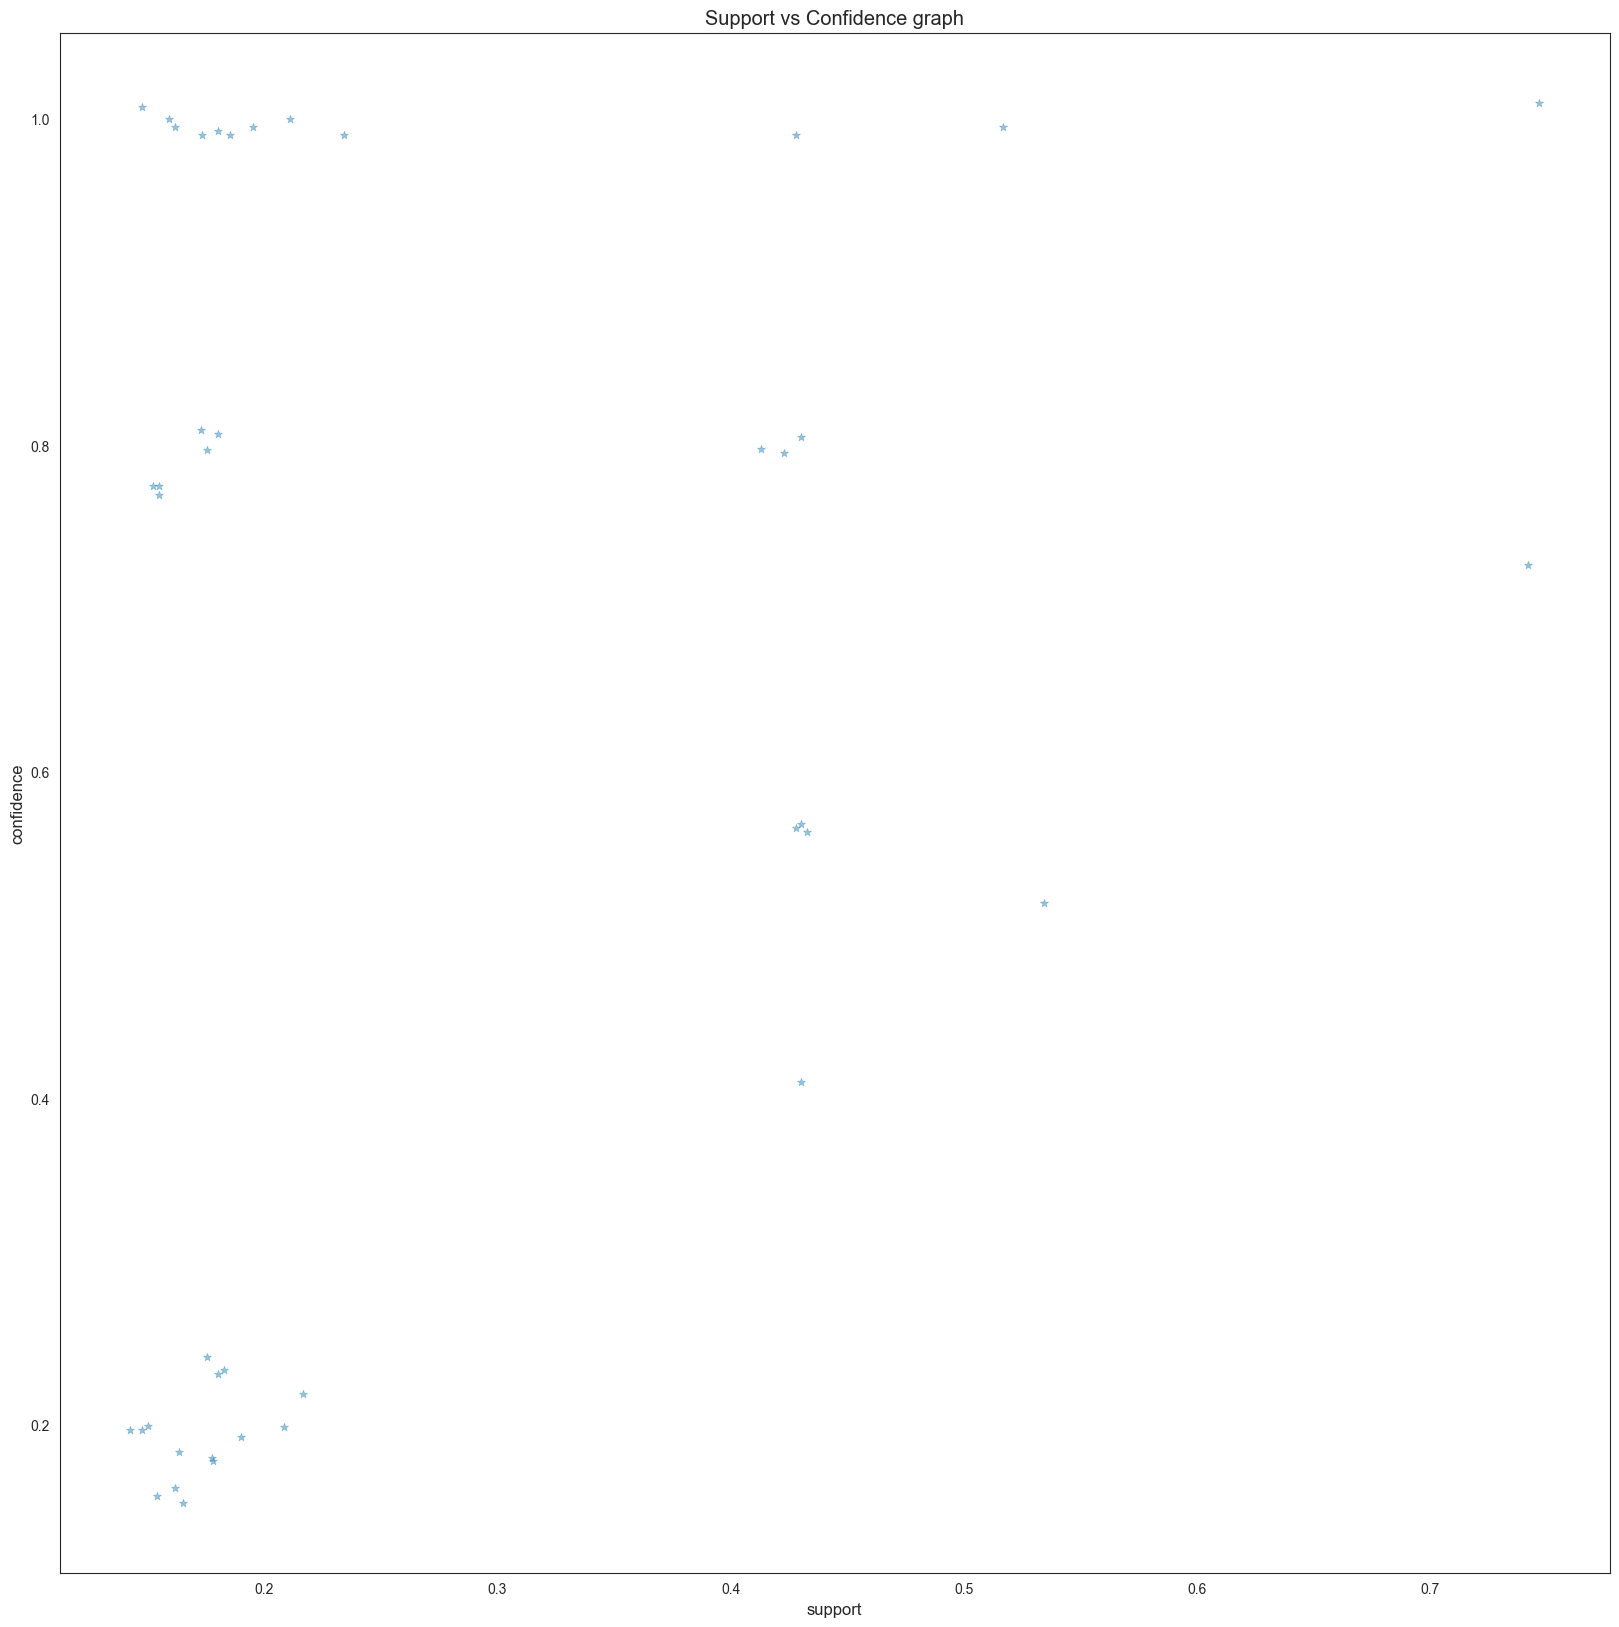

Visualization of Rules


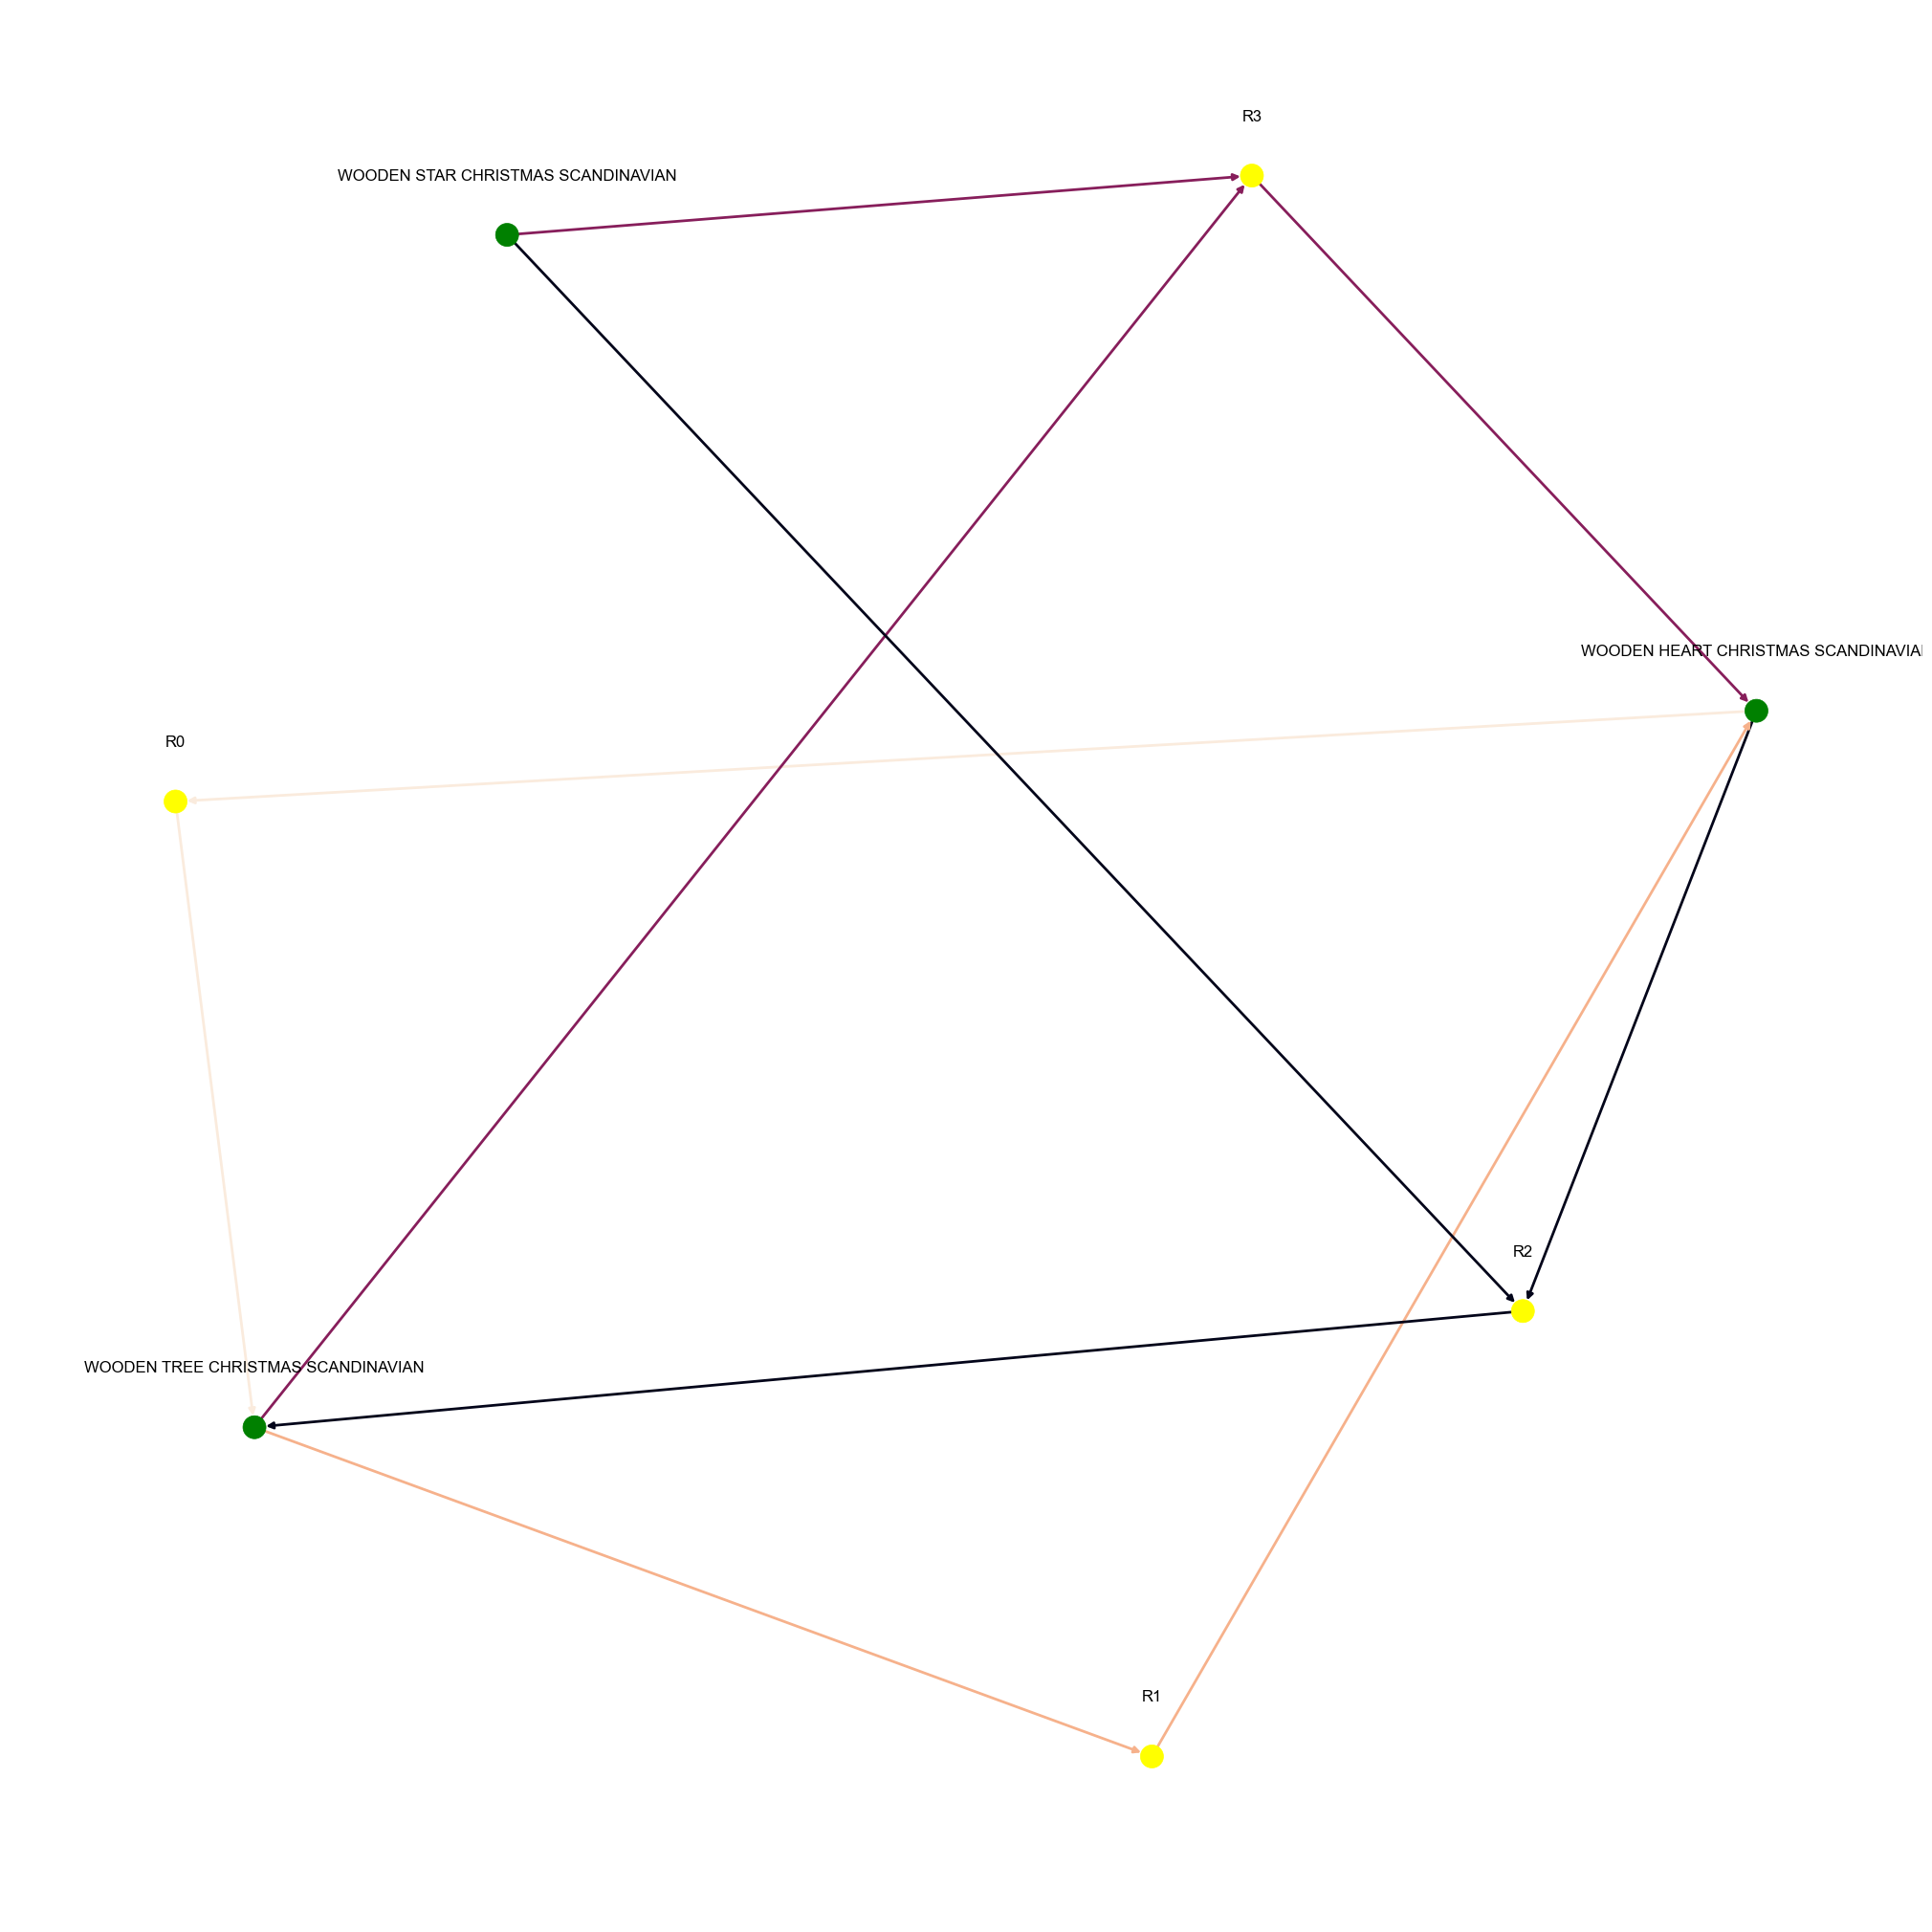

In [136]:
visualize_rules('WOODEN STAR CHRISTMAS SCANDINAVIAN',4)


Items frequently bought together with JAM MAKING SET WITH JARS
[frozenset({'JAM MAKING SET WITH JARS'})
 frozenset({'JAM MAKING SET PRINTED'})
 frozenset({'SET OF 3 CAKE TINS PANTRY DESIGN '})
 frozenset({'RECIPE BOX PANTRY YELLOW DESIGN'})
 frozenset({'SET OF 4 PANTRY JELLY MOULDS'})
 frozenset({'REGENCY CAKESTAND 3 TIER'})]


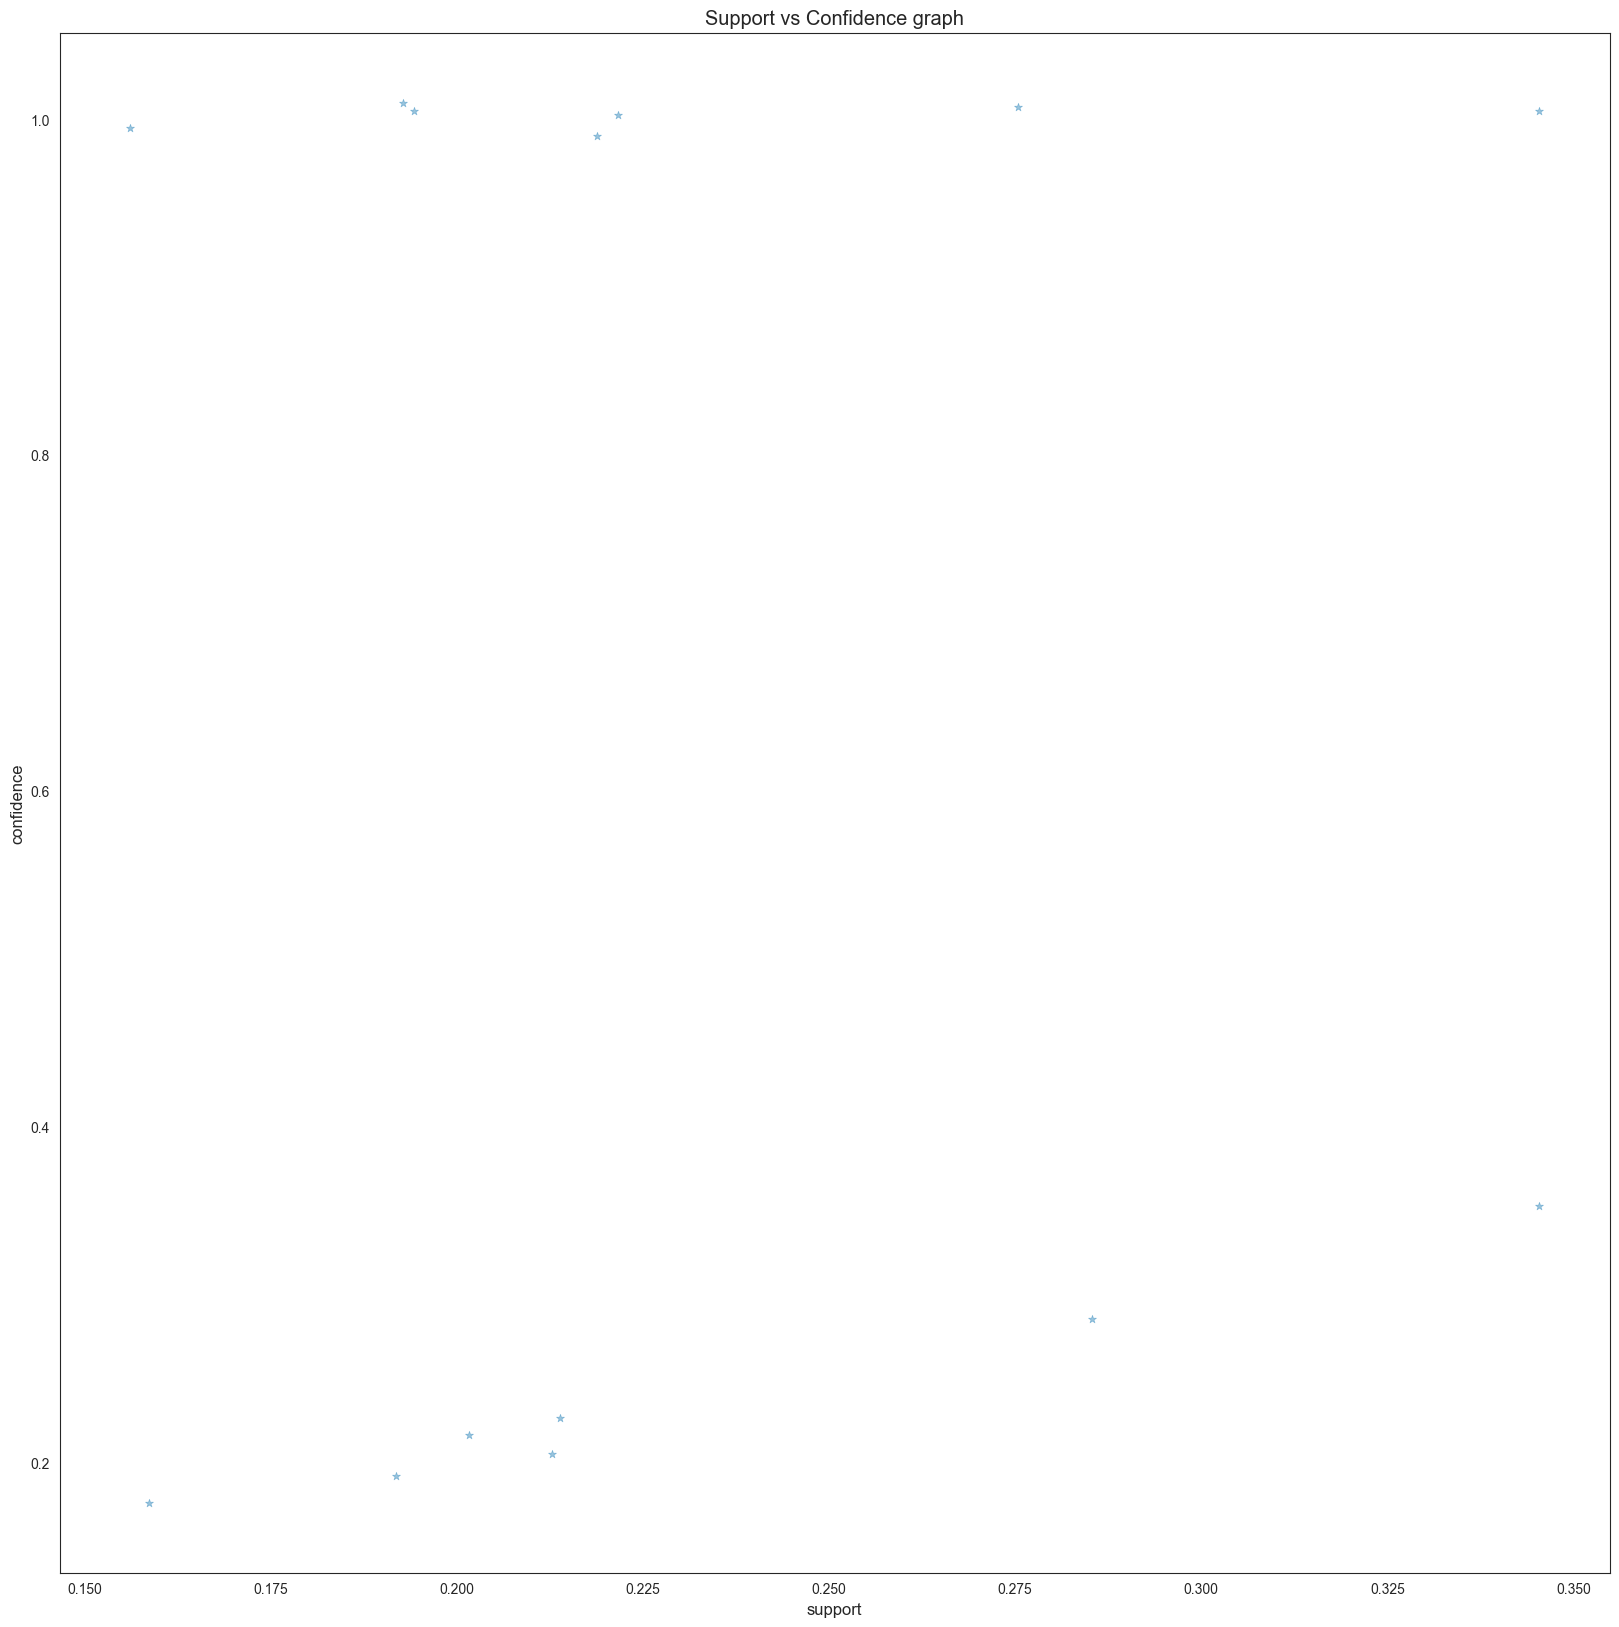

Visualization of Rules


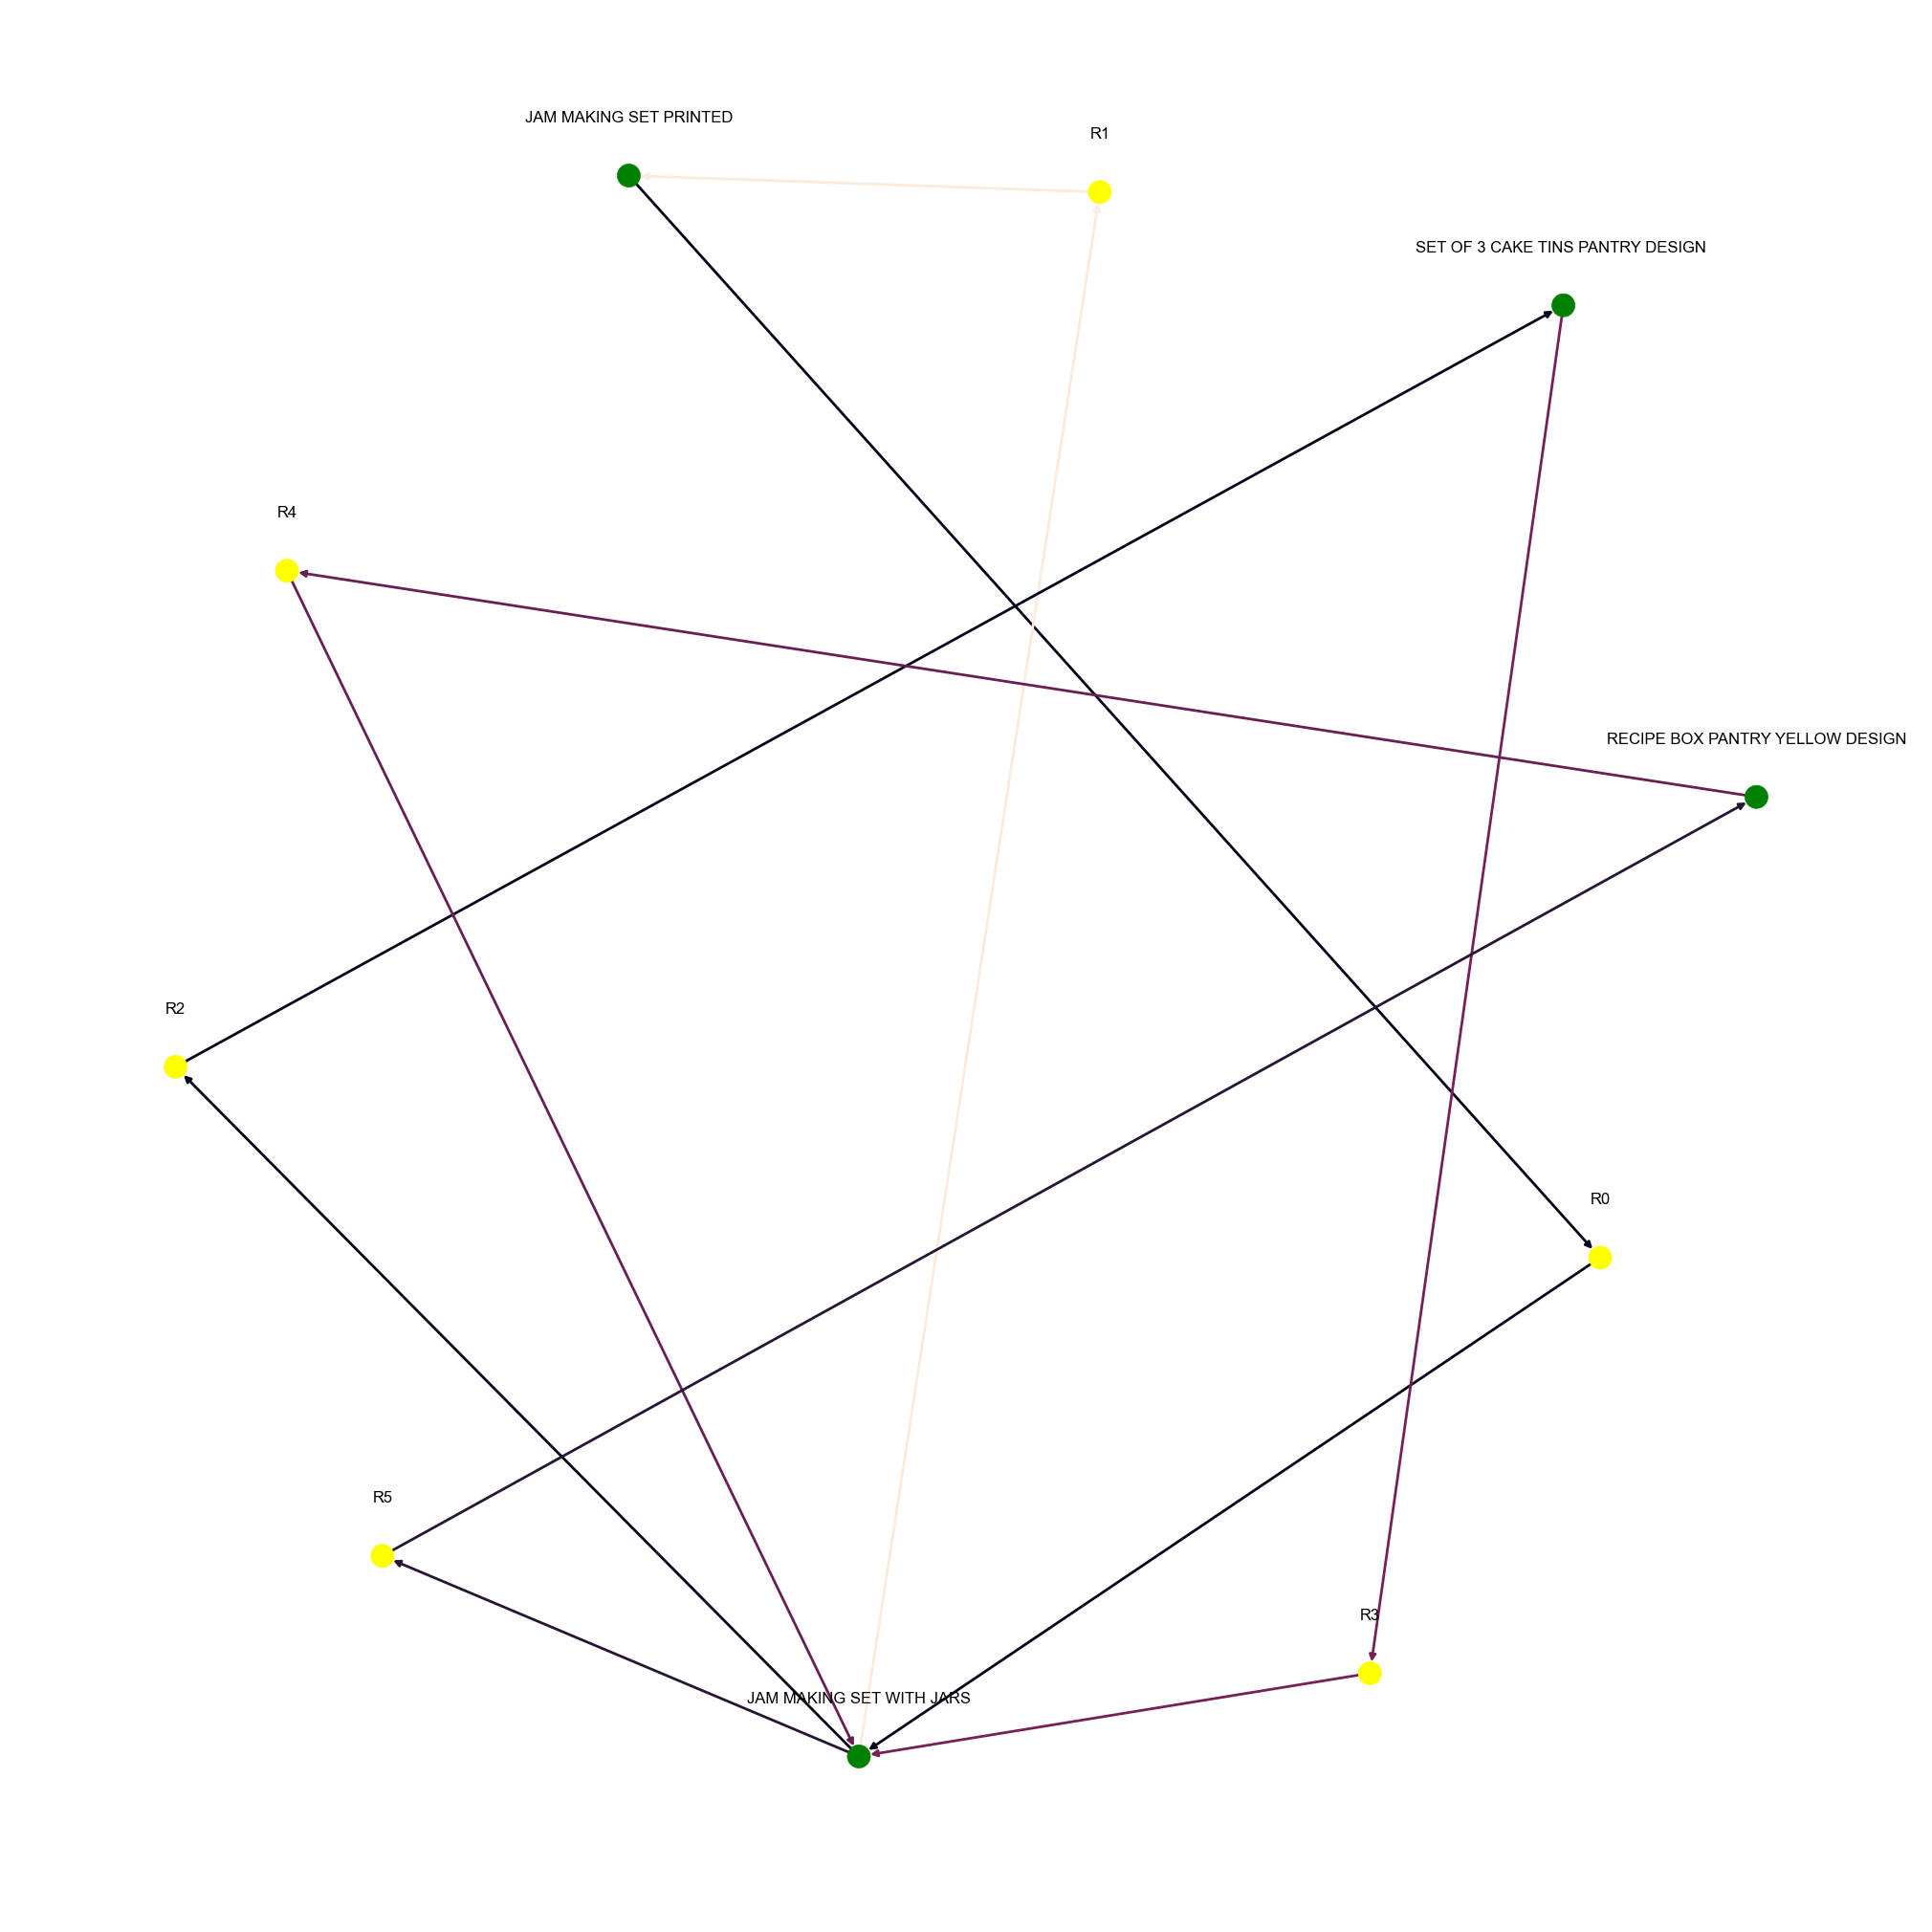

In [137]:
visualize_rules('JAM MAKING SET WITH JARS',6)
